# <b></span><span style='color:#007bff'>Objectives : </span></b>

1.	Data Cleaning & Transformation: Clean the data by removing duplicates, filling missing values, and fixing outliers to prepare it for analysis.
2.	Feature Engineering: Create new features to enhance the predictive power of the model and better capture socio-economic indicators.
3.	Model Training & Evaluation: Train various machine learning models, evaluate their performance, and select the best model for predicting socio-economic outcomes.
4.	Deployment & Integration: Deploy the final model using Gradio to provide an interactive prediction tool for real-world applications and decision-making.

# Setup and Initialization

# <b></span><span style='color:#007bff'>Importing Necessary Libraries </span></b>


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
import mlflow
import mlflow.sklearn
import gradio as gr
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from itertools import combinations, cycle
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
# Ignore warnings
warnings.filterwarnings('ignore')


<a id="load_dataset"></a>
# <b><span style='color:#fcc36d'></span><span style='color:#ff6200'> Loading the Dataset</span></b>


In [82]:
# Load the dataset
nRowsRead = 184
new_data = pd.read_csv('PovStatsCountry.csv', delimiter=',', nrows=nRowsRead)
new_data.dataframeName = 'PovStatsCountry.csv'
nRow, nCol = new_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 184 rows and 31 columns


<h3 align="left"><font color=#ff6200>Dataset Description </font></h3>


* Country Code: ISO country code
* Short Name: Country name in short form
* Table Name: Country name as it appears in tables
* Long Name: Full official name of the country
* 2-alpha code: ISO alpha-2 country code
* Currency Unit: Currency used in the country
* Special Notes: Additional notes specific to the country
* Region: Geographical region
* Income Group: Income classification (e.g., low income, middle income)
* Government Accounting concept: Type of government accounting
* IMF data dissemination standard: IMF data dissemination standard
* Latest population census: Year of the latest population census
* Latest household survey: Year and type of the latest household survey
* Source of most recent Income and expenditure data: Source of income and expenditure data
* Vital registration complete: Whether vital registration is complete
* Latest agricultural census: Year of the latest agricultural census
* Latest industrial data: Year of the latest industrial data
* Latest trade data: Year of the latest trade data

In [83]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       184 non-null    object 
 1   Short Name                                         184 non-null    object 
 2   Table Name                                         184 non-null    object 
 3   Long Name                                          184 non-null    object 
 4   2-alpha code                                       183 non-null    object 
 5   Currency Unit                                      169 non-null    object 
 6   Special Notes                                      105 non-null    object 
 7   Region                                             169 non-null    object 
 8   Income Group                                       169 non-null    object 
 9   WB-2 code 

<h3 align="left"><font color=#ff6200>Inferences:</font></h3>
    
### Overview of the Data:
Total Data: The dataset consists of 184 rows and 31 columns.

* Country Code: Contains the code for each country.
* Short Name: The short name of each country.
* Table Name: The name of the data table.
* Long Name: The long name of each country.
* 2-alpha code: Two-letter country code.
* Currency Unit: The currency unit used in each country.
* Special Notes: Any special notes related to the data.
* Region: The region to which the country belongs.
* Income Group: The income classification of each country.
* WB-2 code: Another code for each country.
* National accounts base year: The base year for national accounts.
* National accounts reference year: The reference year for national accounts (many missing values).
* SNA price valuation: The valuation used in the System of National Accounts.
* Lending category: Lending classification of each country.
* Other groups: Additional group classifications.
* System of National Accounts: The system used for national accounts.
* Alternative conversion factor: Conversion factor for alternative data.
* PPP survey year: The year of the PPP survey.
* Balance of Payments Manual in use: The manual used for balance of payments.
* External debt Reporting status: Reporting status of external debt.
* System of trade: The system used for trade data.
* Government Accounting concept: The accounting concept used by the government.
* IMF data dissemination standard: The standard used for IMF data dissemination.
* Latest population census: The most recent population census year.
* Latest household survey: The most recent household survey year.
* Source of most recent Income and expenditure data: Source of the latest income and expenditure data.
* Vital registration complete: Status of vital registration completeness.
* Latest agricultural census: The most recent agricultural census year.
* Latest industrial data: The most recent industrial data year (many missing values).
* Latest trade data: The most recent trade data year (some missing values).

Initial Observations:

* Missing Values: There are missing values in the 'National accounts reference year', 'Latest industrial data', and 'Latest trade data' columns.
* Data Types: Most columns are integer types, with a few float types.
* Non-null Counts: The non-null counts for some columns are less than the total, indicating missing data.
Next Steps:

Clean the Data: Address missing values and correct any data inconsistencies.
Feature Engineering: Create new features to enhance the model's predictive power.

Next Steps:

Address missing data, especially in the "National accounts reference year" and "Latest industrial data" columns.
Consider managing the variability in the years for consistency.
Ensure categorical values are correctly encoded for analysis and modeling.

# <b></span><span style='color:#ff6200'> Data processing
</span></b>


In [84]:
columns_to_drop = [
    'Table Name', 'Special Notes', 'Government Accounting concept', 
    'IMF data dissemination standard', 'Source of most recent Income and expenditure data', 
    'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 
    'Latest trade data', 'Unnamed: 30'
]

In [85]:
data_cleaned = new_data.drop(columns=columns_to_drop)

In [86]:
# Display basic dataset information
print(new_data.columns)
new_data

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', 'Unnamed: 30'],
      dtype='object')


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",NaN,NaN,NaN,2016.0,NaN
1,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2016.0,NaN
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2016.0,NaN
3,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,National Institute of Statistics and Census re...,Latin America & Caribbean,Upper middle income,AR,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey, 2011/12","Integrated household survey (IHS), 2016",Yes,2008,2002.0,2016.0,NaN
4,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2015",Yes,2014,NaN,2016.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,WB-3 code changed from KSV to XKX to align wit...,Europe & Central Asia,Lower middle income,XK,...,NaN,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2013/14","Expenditure survey/budget survey (ES/BS), 2015",NaN,2014,NaN,NaN,NaN
180,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,NaN,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2014",NaN,NaN,2012.0,2016.0,NaN
181,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2003; World Hea...","Expenditure survey/budget survey (ES/BS), 2014/15",NaN,2007,2010.0,2016.0,NaN
182,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,The base year is 2010. National accounts data ...,Sub-Saharan Africa,Lower middle income,ZM,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2010,"Demographic and Health Survey, 2013/14","Integrated household survey (IHS), 2015",NaN,NaN,1994.0,2016.0,NaN


# <b><span style='color:#fcc36d'> </span><span style='color:#ff6200'> Handling Missing Values</span>

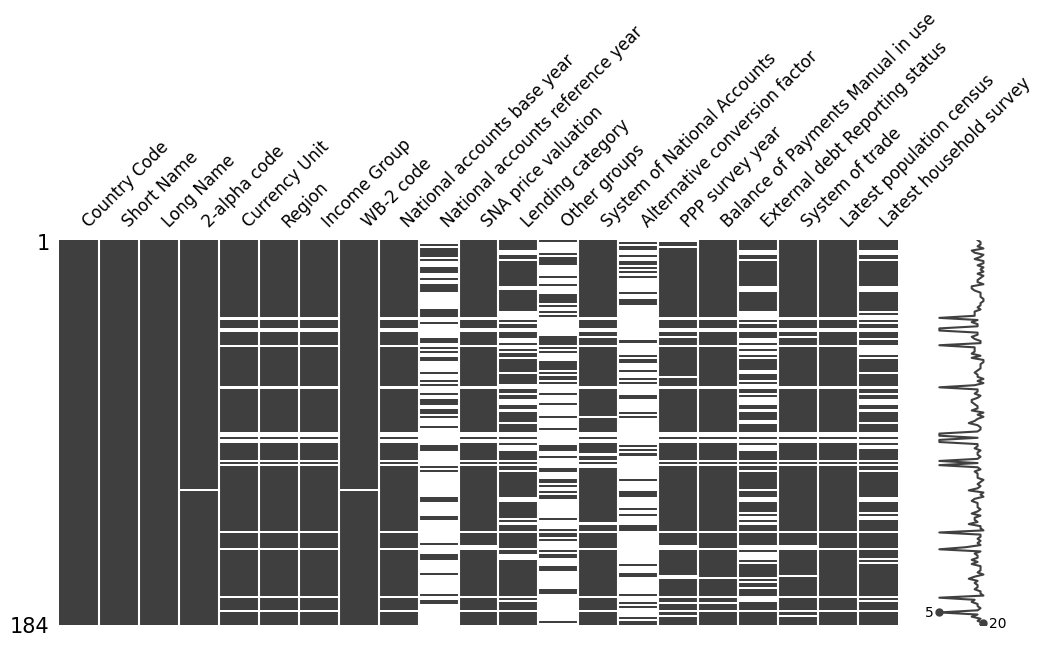

In [87]:
# Visualize missing values
msno.matrix(data_cleaned, figsize=(12, 5), fontsize=12)
plt.show()

In [88]:
data_cleaned.isnull().sum().sort_values(ascending=False)

Alternative conversion factor        139
National accounts reference year     131
Other groups                         126
External debt Reporting status        65
Lending category                      49
Latest household survey               48
PPP survey year                       24
System of National Accounts           20
System of trade                       19
Balance of Payments Manual in use     17
SNA price valuation                   16
National accounts base year           15
Income Group                          15
Region                                15
Currency Unit                         15
Latest population census              15
WB-2 code                              1
2-alpha code                           1
Short Name                             0
Long Name                              0
Country Code                           0
dtype: int64

In [89]:
#percentage of missing values
missing = data_cleaned.isnull().sum()
total = len(data_cleaned)
missing_perc = round((missing/total) * 100,2)
missing_perc.sort_values(ascending=False)

Alternative conversion factor        75.54
National accounts reference year     71.20
Other groups                         68.48
External debt Reporting status       35.33
Lending category                     26.63
Latest household survey              26.09
PPP survey year                      13.04
System of National Accounts          10.87
System of trade                      10.33
Balance of Payments Manual in use     9.24
SNA price valuation                   8.70
National accounts base year           8.15
Income Group                          8.15
Region                                8.15
Currency Unit                         8.15
Latest population census              8.15
WB-2 code                             0.54
2-alpha code                          0.54
Short Name                            0.00
Long Name                             0.00
Country Code                          0.00
dtype: float64

In [90]:
# Interpolate for numerical value using forward fill and backward fill
data_cleaned['National accounts reference year'] = data_cleaned['National accounts reference year'].fillna(method='ffill').fillna(method='bfill')

In [91]:
# Function to identify column types
def identify_columns(df):
    column_types = {}
    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 2:
            column_types[col] = 'Binary'
        elif df[col].dtype == 'object' or unique_values < df.shape[0] * 0.1:
            column_types[col] = 'Categorical'
        else:
            column_types[col] = 'Other'
    return column_types

In [92]:
# Get column types
column_types = identify_columns(data_cleaned)
column_types

{'Country Code': 'Categorical',
 'Short Name': 'Categorical',
 'Long Name': 'Categorical',
 '2-alpha code': 'Categorical',
 'Currency Unit': 'Categorical',
 'Region': 'Categorical',
 'Income Group': 'Categorical',
 'WB-2 code': 'Categorical',
 'National accounts base year': 'Categorical',
 'National accounts reference year': 'Categorical',
 'SNA price valuation': 'Binary',
 'Lending category': 'Categorical',
 'Other groups': 'Binary',
 'System of National Accounts': 'Categorical',
 'Alternative conversion factor': 'Categorical',
 'PPP survey year': 'Categorical',
 'Balance of Payments Manual in use': 'Binary',
 'External debt Reporting status': 'Categorical',
 'System of trade': 'Binary',
 'Latest population census': 'Categorical',
 'Latest household survey': 'Categorical'}

In [93]:
# Fill missing values for categorical and binary columns
for col, col_type in column_types.items():
    if col_type == 'Categorical' or col_type == 'Binary':
        data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)
data_cleaned.head(2)

,Country Code,Short Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,...,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Latest population census,Latest household survey
0,AFG,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,1996.0,...,IDA,HIPC,Country uses the 1993 System of National Accou...,1990–95,2011,BPM6,Actual,General trade system,1979,"Demographic and Health Survey, 2015"
1,AGO,Angola,People's Republic of Angola,AO,Angolan kwanza,Sub-Saharan Africa,Lower middle income,AO,2002,1996.0,...,IBRD,HIPC,Country uses the 1993 System of National Accou...,1991–96,2011,BPM6,Actual,Special trade system,2014,"Demographic and Health Survey, 2015/16"


# <b><span style='color:#fcc36d'></span><span style='color:#ff6200'> Handling Duplicates</span></b>

In [94]:
# Check for duplicated rows
duplicates = data_cleaned.duplicated()
print("Duplicated rows:\n", duplicates)
print("\nTotal number of duplicated rows:", duplicates.sum())


Duplicated rows:
 0      False
1      False
2      False
3      False
4      False
       ...  
179    False
180    False
181    False
182    False
183    False
Length: 184, dtype: bool

Total number of duplicated rows: 0


# <b><span style='color:#fcc36d'></span><span style='color:#ff6200'> Handling Nan valuse</span></b>

In [95]:
# Check for any NaN values in the DataFrame
has_nan = data_cleaned.isnull().values.any()
print("Are there any NaN values in the DataFrame?:", has_nan)

Are there any NaN values in the DataFrame?: False


In [96]:
# Count NaN values per column
nan_counts = data_cleaned.isnull().sum()
print("NaN values per column:\n", nan_counts)

NaN values per column:
 Country Code                         0
Short Name                           0
Long Name                            0
2-alpha code                         0
Currency Unit                        0
Region                               0
Income Group                         0
WB-2 code                            0
National accounts base year          0
National accounts reference year     0
SNA price valuation                  0
Lending category                     0
Other groups                         0
System of National Accounts          0
Alternative conversion factor        0
PPP survey year                      0
Balance of Payments Manual in use    0
External debt Reporting status       0
System of trade                      0
Latest population census             0
Latest household survey              0
dtype: int64


# <b><span style='color:#fcc36d'></span><span style='color:#ff6200'> Summary Statistics</span></b>


In [97]:
# Summary statistics for numerical variables
new_data['Latest population census'].describe()

count      169
unique      31
top       2011
freq        30
Name: Latest population census, dtype: object

In [98]:
# Summary statistics for categorical variables
new_data.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
National accounts reference year,53.0,2008.0,5.0,1995.0,2010.0,2010.0,2010.0,2015.0
Latest industrial data,131.0,2007.0,9.0,1973.0,2004.0,2012.0,2013.0,2014.0
Latest trade data,180.0,2016.0,0.0,2014.0,2016.0,2016.0,2016.0,2016.0
Unnamed: 30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
def categorical_summary(new_data):
    summary = new_data.select_dtypes(include=['object', 'category', 'bool']).describe().T
    return summary

# Generate summary statistics for the provided DataFrame
summary_statistics = categorical_summary(new_data)
print(summary_statistics)

                                                  count unique  \
Country Code                                        184    184   
Short Name                                          184    184   
Table Name                                          184    184   
Long Name                                           184    184   
2-alpha code                                        183    183   
Currency Unit                                       169    127   
Special Notes                                       105     96   
Region                                              169      7   
Income Group                                        169      4   
WB-2 code                                           183    183   
National accounts base year                         169     34   
SNA price valuation                                 168      2   
Lending category                                    135      4   
Other groups                                         58      2   
System of 

<h3 align="left"><font color=#ff6200>Inferences:</font></h3>
1. National Accounts Reference Year:

Count: 53 entries out of 184, indicating some missing data.
Range: The years span from 1995 to 2015.
Mean: The average year is 2008.
Variability: A standard deviation of 5 years suggests moderate variability in the reference years.

2. Latest Industrial Data:

Count: 131 entries out of 184.
Range: The years range from 1973 to 2014.
Mean: The average year is 2007.
Variability: A standard deviation of 9 years indicates considerable variability in the years of the latest industrial data.

3. Latest Trade Data:

Count: 180 entries out of 184, with some missing data.
Range: The data ranges from 2014 to 2016.
Mean: The average year is 2016, indicating recent data.
Variability: There is no variability (standard deviation is 0), showing all entries are from the same year.

4. Categorical Features:

Region: 7 unique values, with 'East Asia & Pacific' being the most frequent.
Income Group: 4 unique values, with 'Lower middle income' being the most frequent.
Lending Category: 4 unique values, 'IBRD' being the most frequent.
Special Notes: 96 unique notes, indicating a high variety of special notes attached to the data.
Currency Unit: 127 unique values, with 'Euro' appearing the most.
System of National Accounts: 3 unique values, with 'Country uses the 1993 System of National Accounts' being the most frequent.
Balance of Payments Manual in Use: 2 unique values, 'BPM6' being the most common.


In [100]:
print(f"{data_cleaned.shape[0]} rows and {data_cleaned.shape[1]} columns")

184 rows and 21 columns


In [101]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Code                       184 non-null    object 
 1   Short Name                         184 non-null    object 
 2   Long Name                          184 non-null    object 
 3   2-alpha code                       184 non-null    object 
 4   Currency Unit                      184 non-null    object 
 5   Region                             184 non-null    object 
 6   Income Group                       184 non-null    object 
 7   WB-2 code                          184 non-null    object 
 8   National accounts base year        184 non-null    object 
 9   National accounts reference year   184 non-null    float64
 10  SNA price valuation                184 non-null    object 
 11  Lending category                   184 non-null    object 

In [102]:
data_cleaned['SNA price valuation']

0         Value added at basic prices (VAB)
1      Value added at producer prices (VAP)
2         Value added at basic prices (VAB)
3         Value added at basic prices (VAB)
4         Value added at basic prices (VAB)
                       ...                 
179       Value added at basic prices (VAB)
180       Value added at basic prices (VAB)
181       Value added at basic prices (VAB)
182       Value added at basic prices (VAB)
183       Value added at basic prices (VAB)
Name: SNA price valuation, Length: 184, dtype: object

# <b><span style='color:#fcc36d'></span><span style='color:#ff6200'> Features engineering</span></b>


#### This new column allows to see how different income groups are distributed across various regions.


In [103]:
# Create interaction feature
data_cleaned['Income_Group_vs_Region'] = data_cleaned['Income Group'] + "_" + data_cleaned['Region']

In [104]:
# Function to shorten the text
def shorten_sna(text):
    if isinstance(text, str):
        parts = text.split()
        if len(parts) >= 4 and parts[3].isdigit():
            year = parts[3]
            return f'SNA {year}'
    return text  # Return the text as-is if it is not a string or doesn't match the expected pattern

# Apply the function to the column
data_cleaned['System of National Accounts'] = data_cleaned['System of National Accounts'].apply(shorten_sna)



In [105]:
data_cleaned.sample(1)

,Country Code,Short Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,...,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Latest population census,Latest household survey,Income_Group_vs_Region
13,BGR,Bulgaria,Republic of Bulgaria,BG,Bulgarian lev,Europe & Central Asia,Upper middle income,BG,Original chained constant price data are resca...,2010.0,...,HIPC,SNA 2008,"1978–89, 1991–92",Rolling,BPM6,Actual,Special trade system,2011,"Living Standards Measurement Study, 2007",Upper middle income_Europe & Central Asia


In [106]:
print(data_cleaned.iloc[180])


Country Code                                                                    YEM
Short Name                                                                    Yemen
Long Name                                                         Republic of Yemen
2-alpha code                                                                     YE
Currency Unit                                                           Yemeni rial
Region                                                   Middle East & North Africa
Income Group                                                    Lower middle income
WB-2 code                                                                        RY
National accounts base year                                                    1990
National accounts reference year                                             1997.0
SNA price valuation                               Value added at basic prices (VAB)
Lending category                                                            

# <b><span style='color:#fcc36d'> </span><span style='color:#ff6200'> Data Analysis & Data Visualization </span>

## <b><span style='color:#fcc36d'> </span><span style='color:#007bff'> Univariate Analysis, Bivariate and Multivariate Analysis </span>

In [107]:
#  function to plot column distributions 
def plot_per_column_distribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    filtered_data = df[[col for col in df if 1 < nunique[col] < 50]]
    nRow, nCol = filtered_data.shape
    columnNames = list(filtered_data)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    
    plt.figure(num=None, figsize=(7 * nGraphPerRow, 6 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = filtered_data.iloc[:, i]
        
        if pd.api.types.is_numeric_dtype(columnDf):
            columnDf.hist()
        else:
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        
        plt.ylabel('Counts')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3, wspace=0.4, hspace=0.9)
    plt.show()

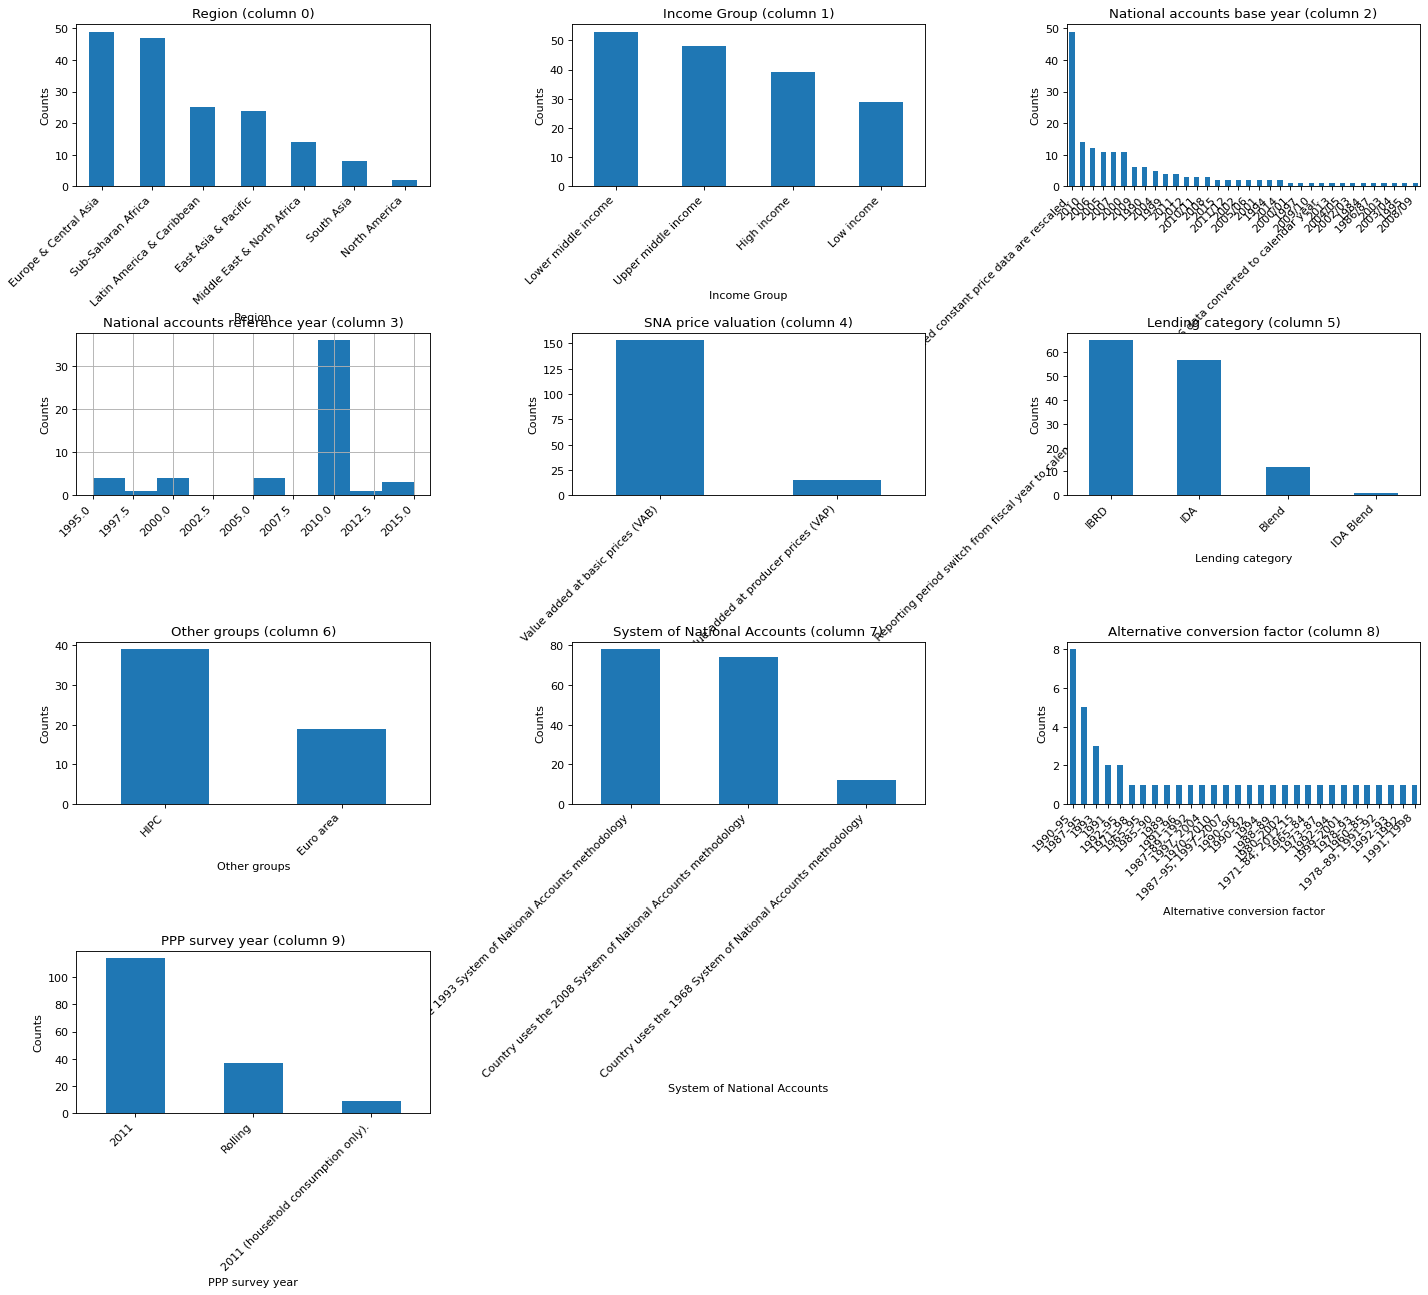

In [108]:
plot_per_column_distribution(new_data, 10, 3)

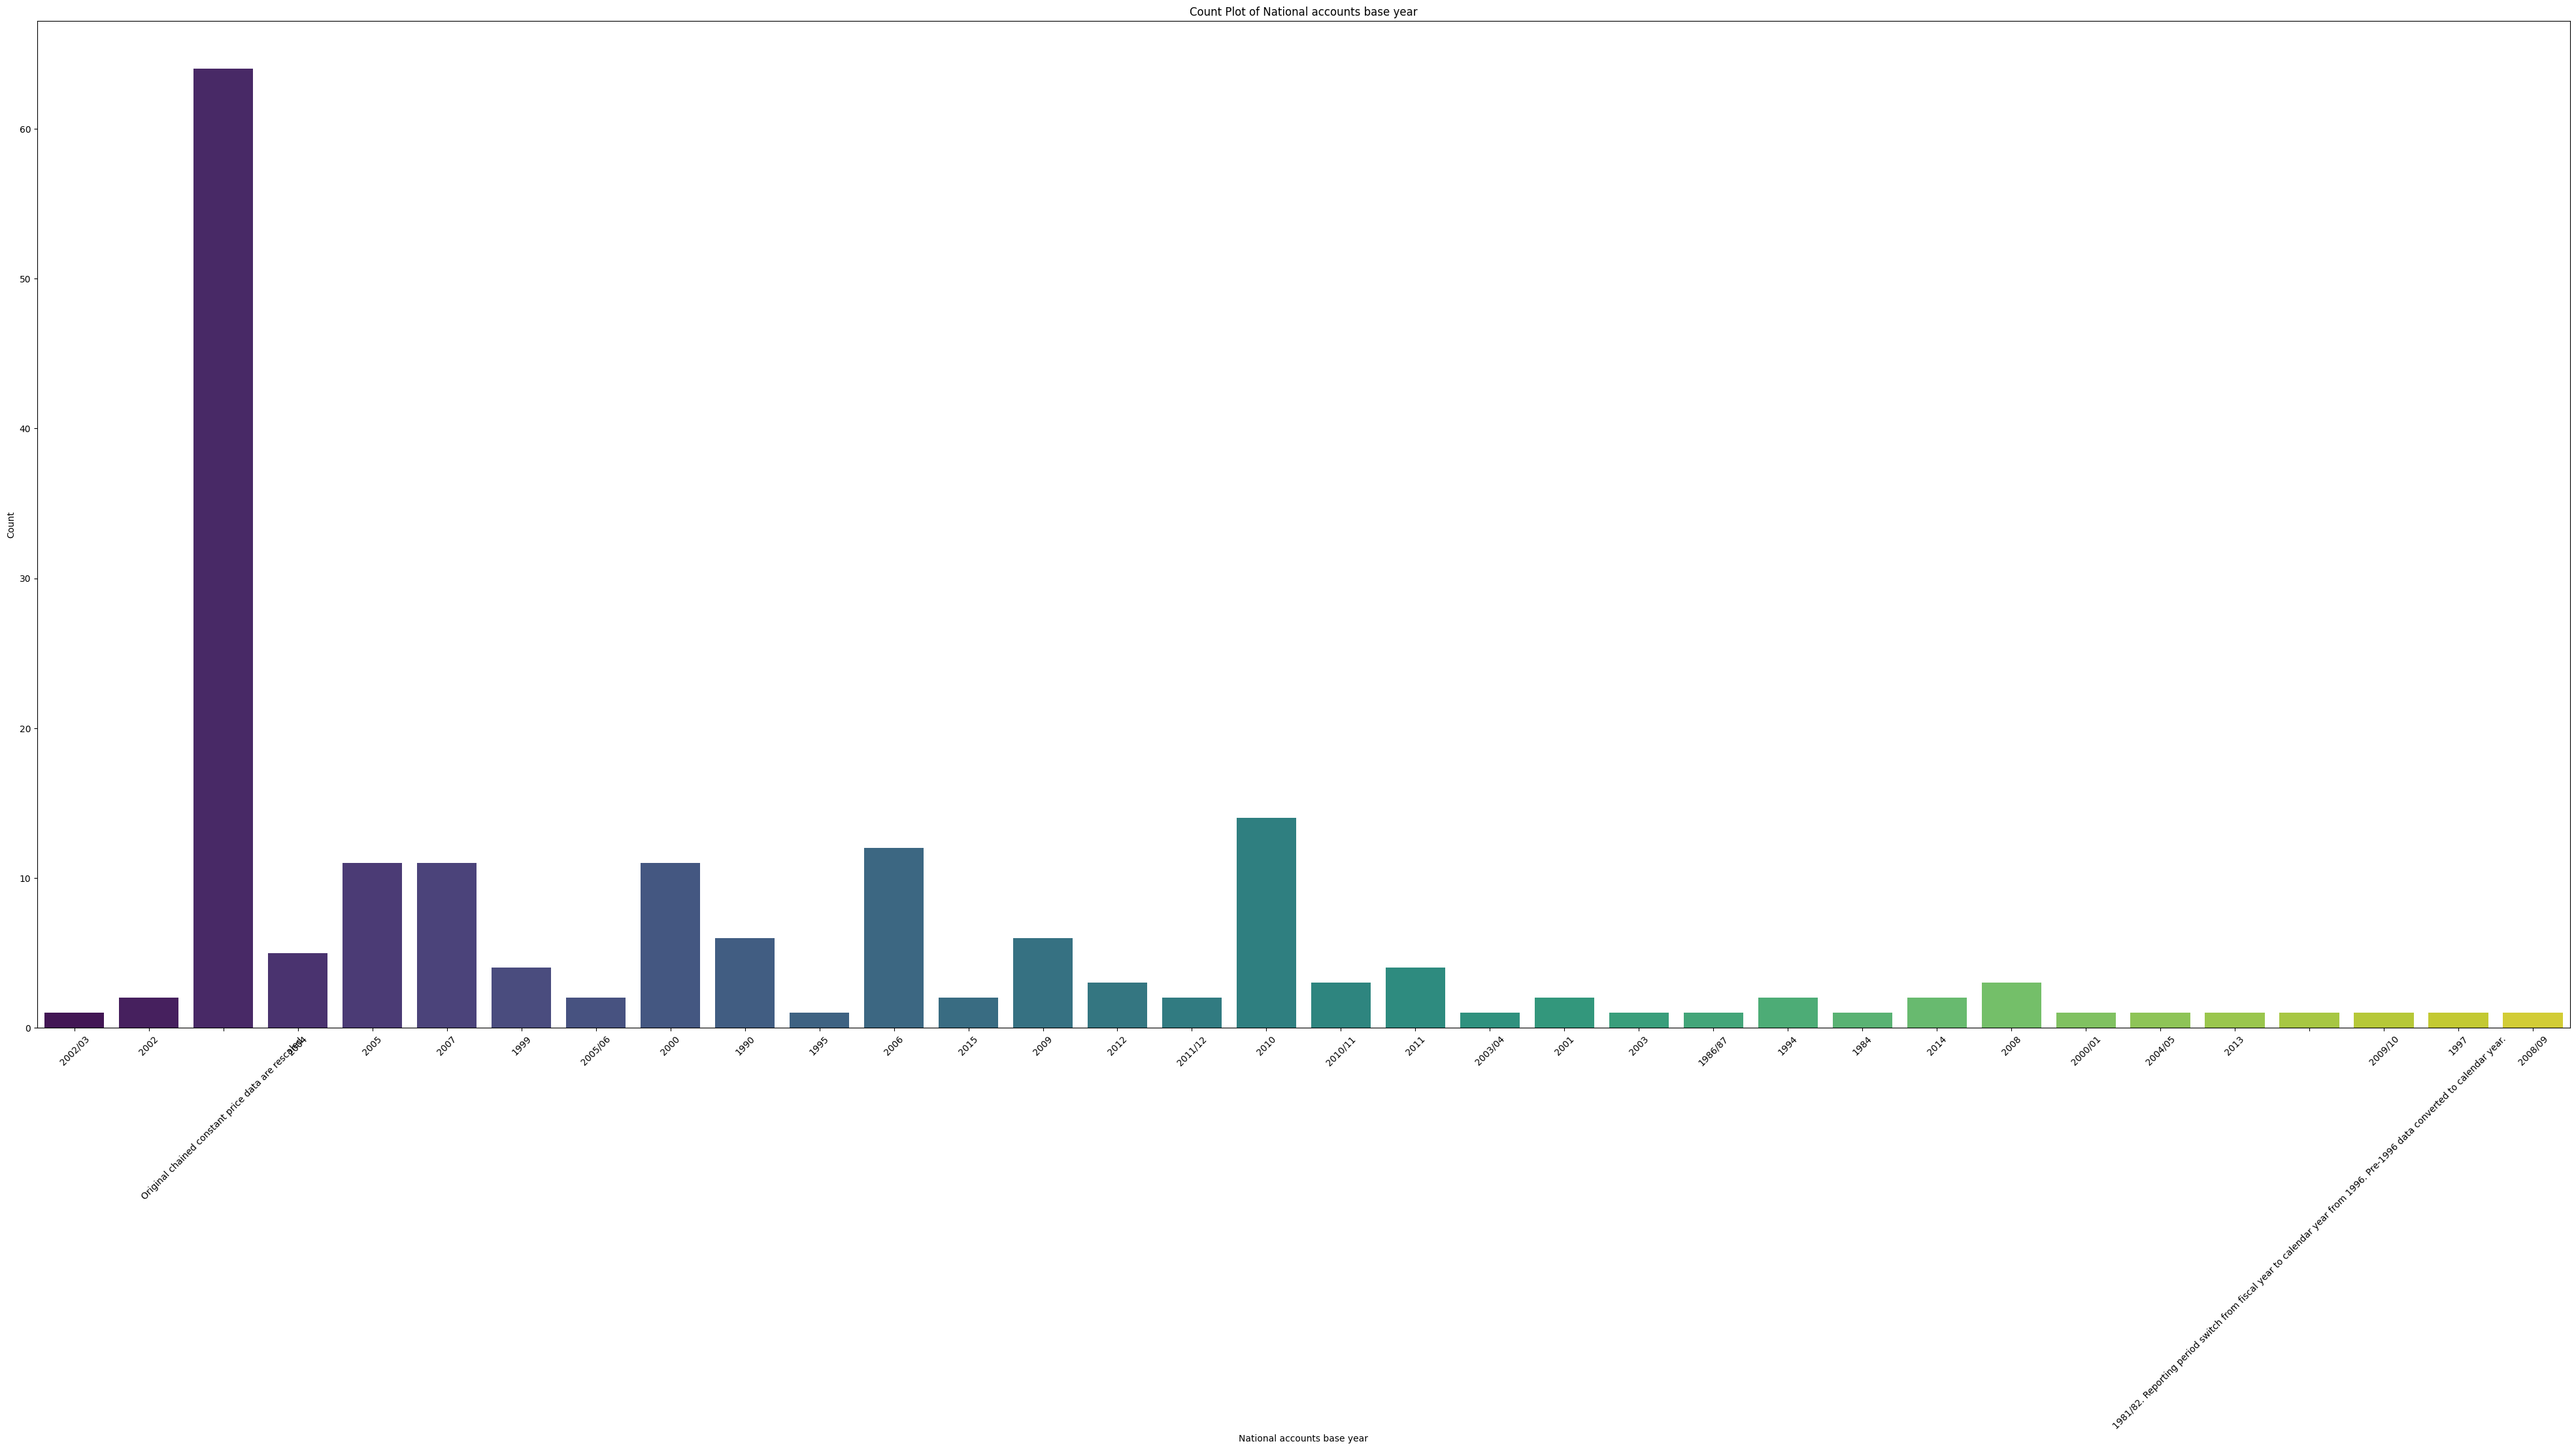

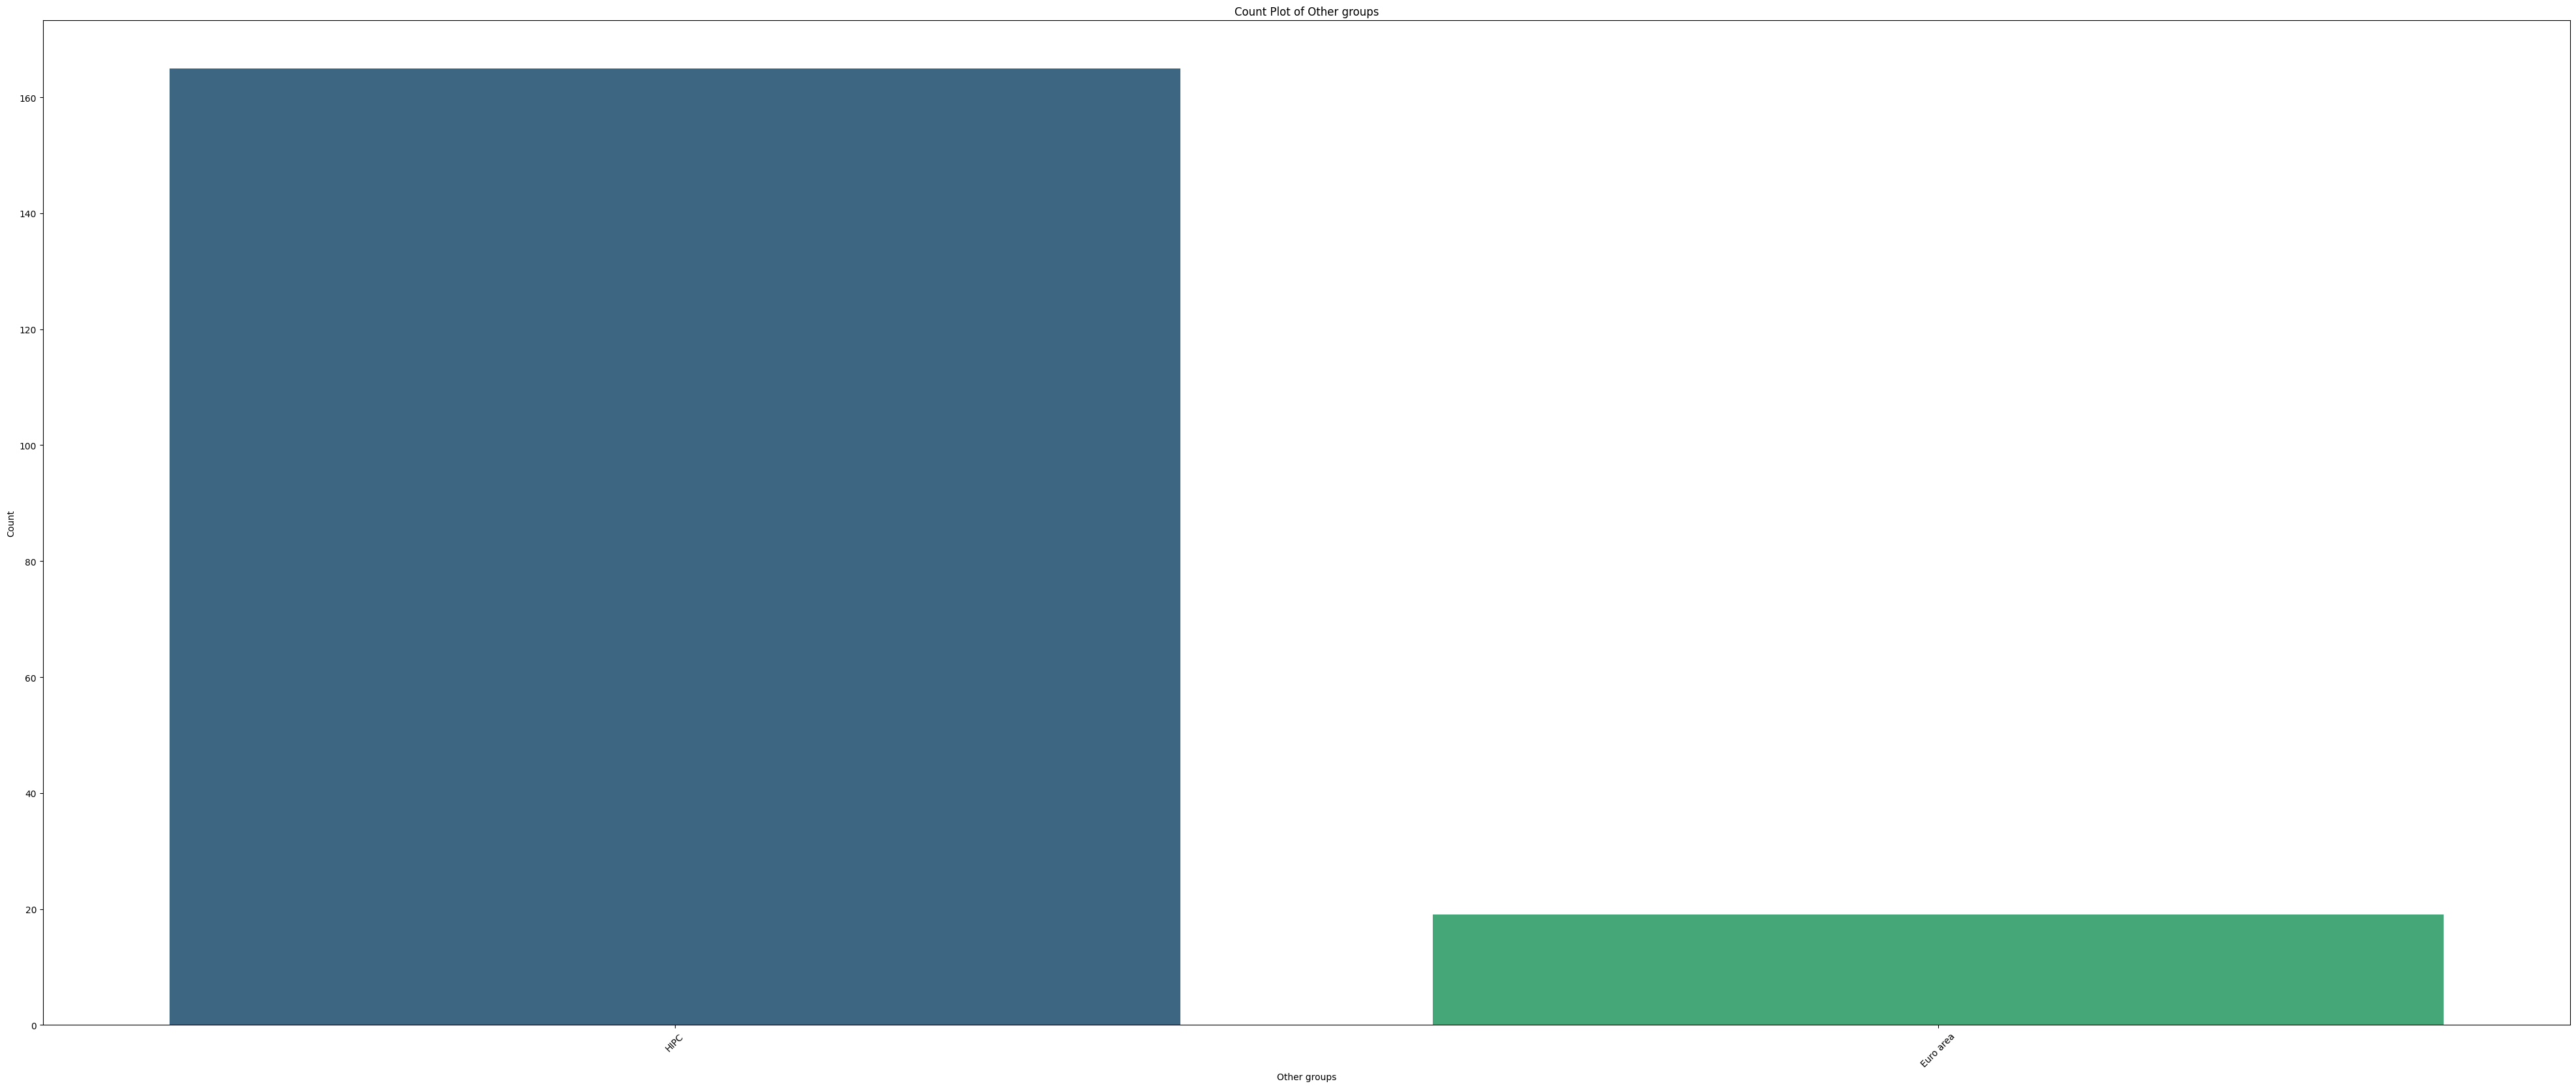

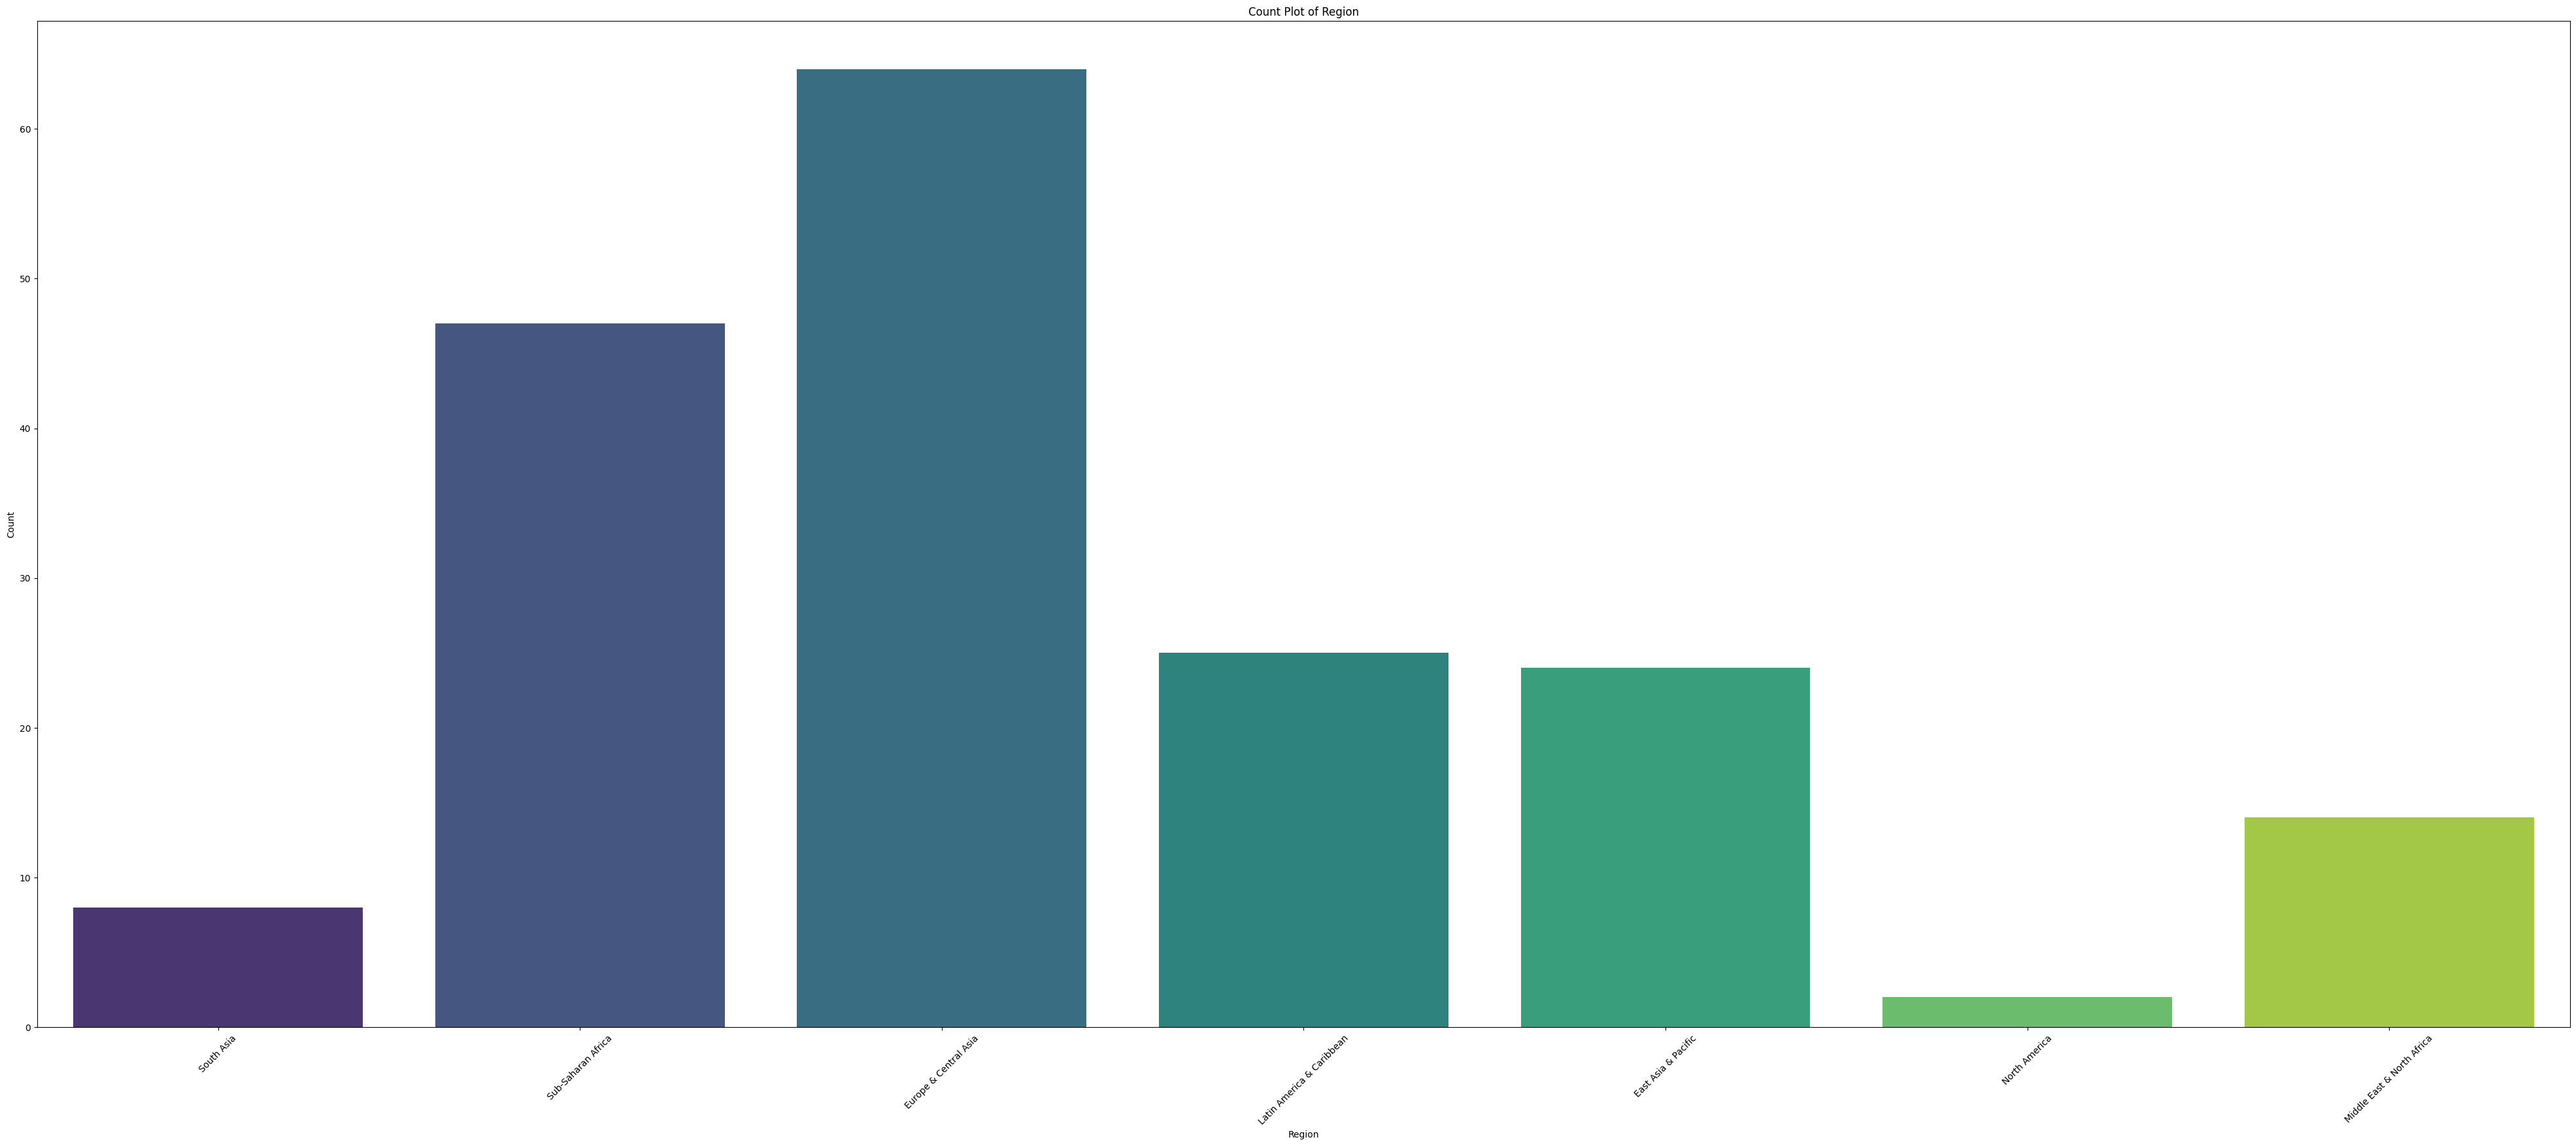

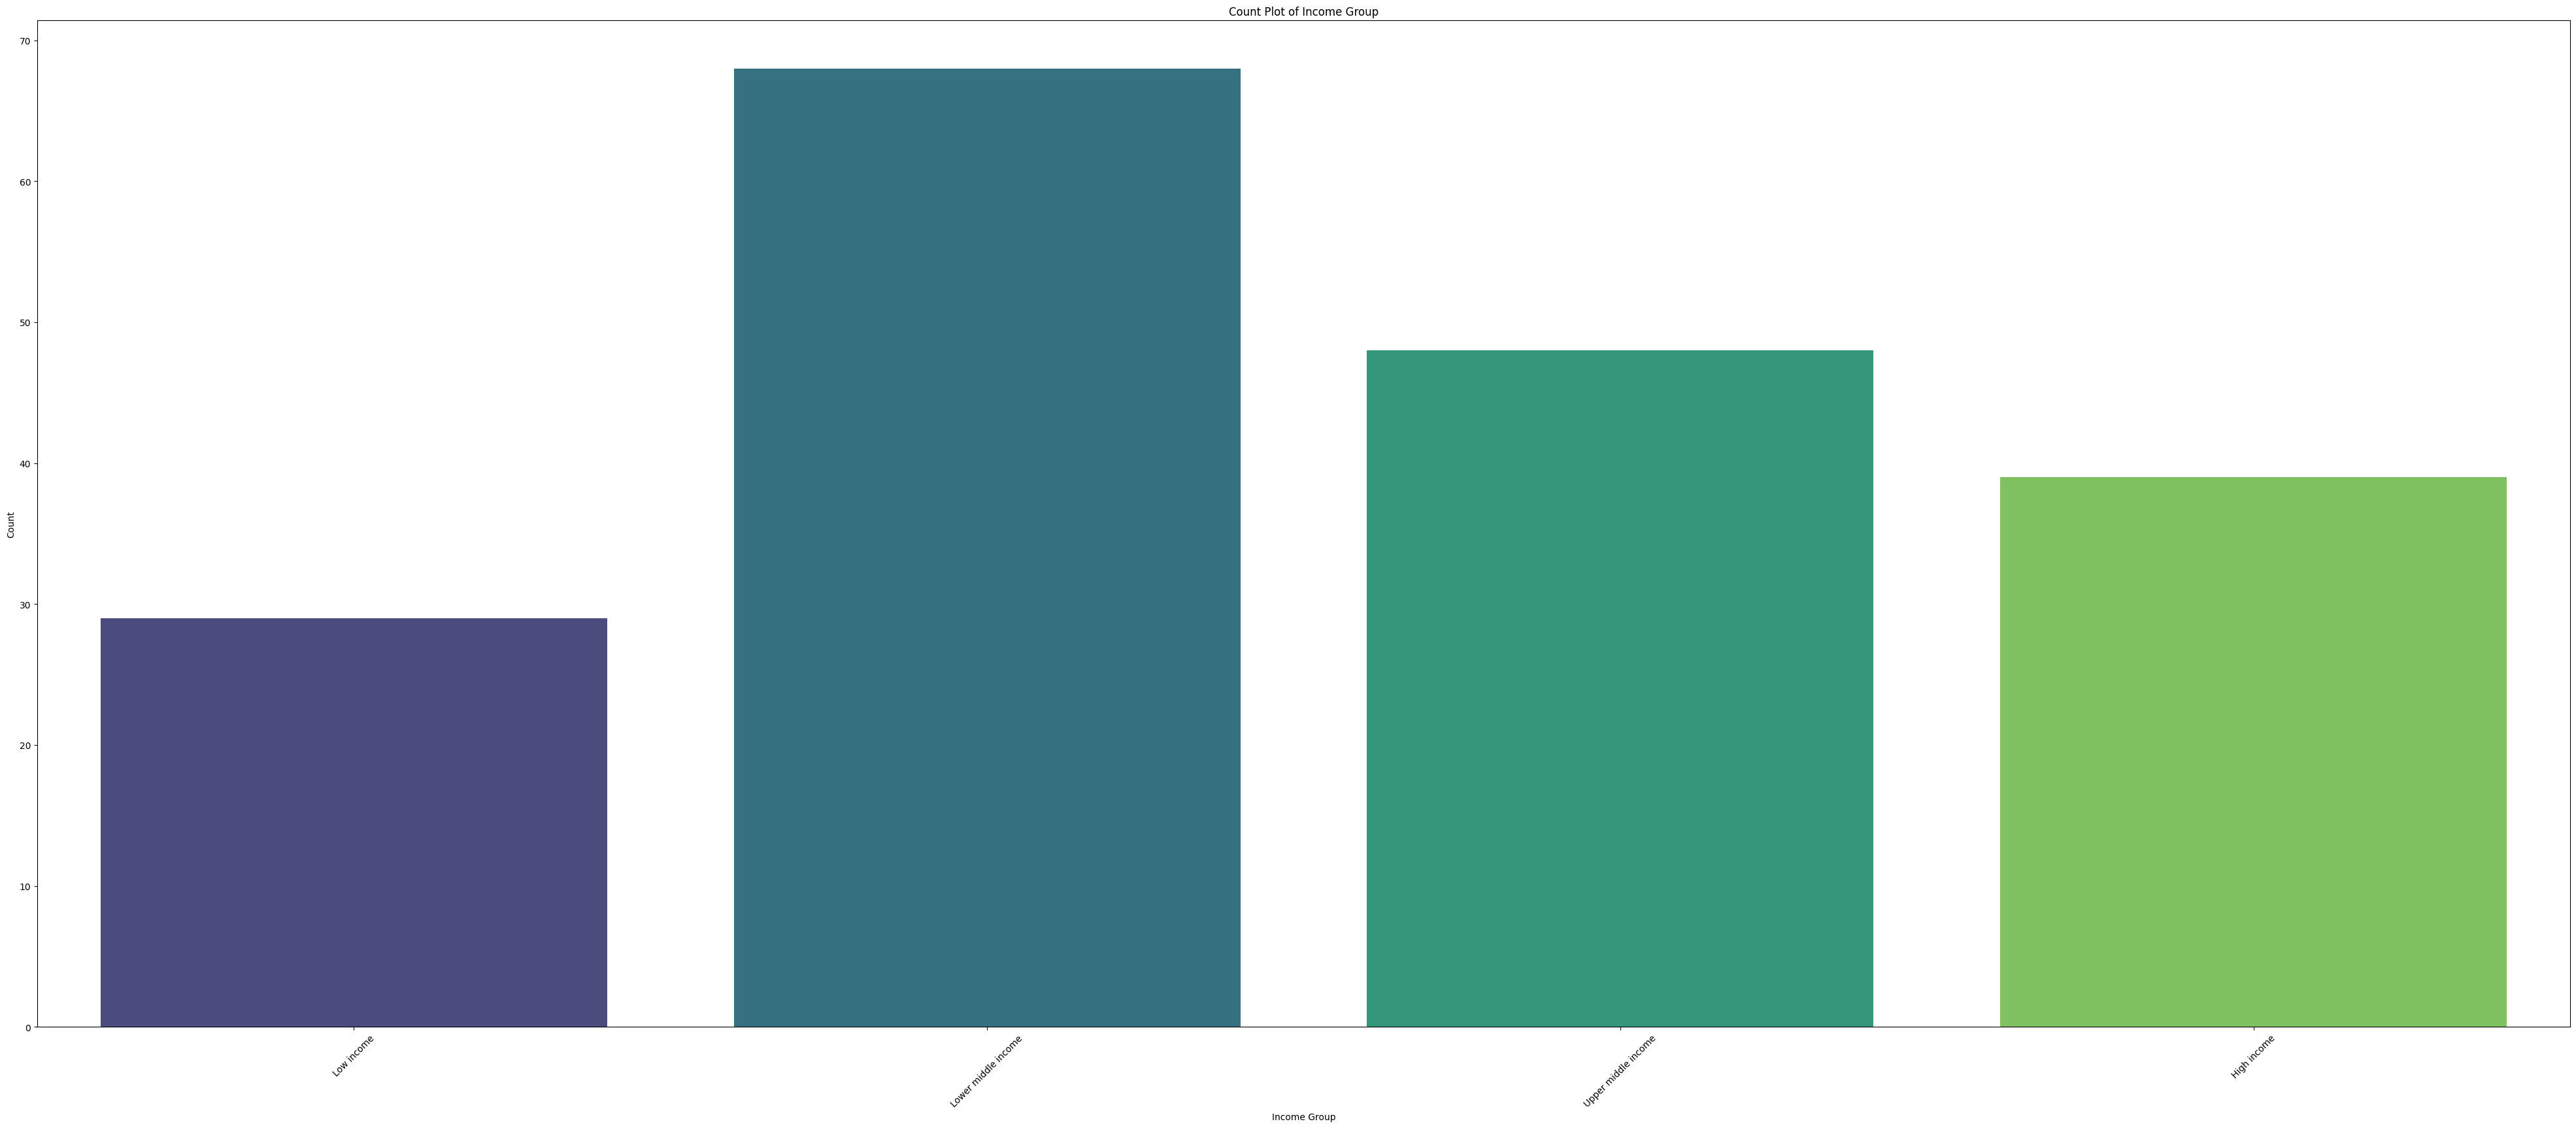

In [109]:
# Function to create count plots
def count_plot(data, column_name):
    plt.figure(figsize=(50, 20))
    sns.countplot(data=data, x=column_name, palette='viridis')
    plt.title(f'Count Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
# Generate count plots
count_plot(data_cleaned, 'National accounts base year')
count_plot(data_cleaned, 'Other groups')
count_plot(data_cleaned, 'Region')
count_plot(data_cleaned, 'Income Group')

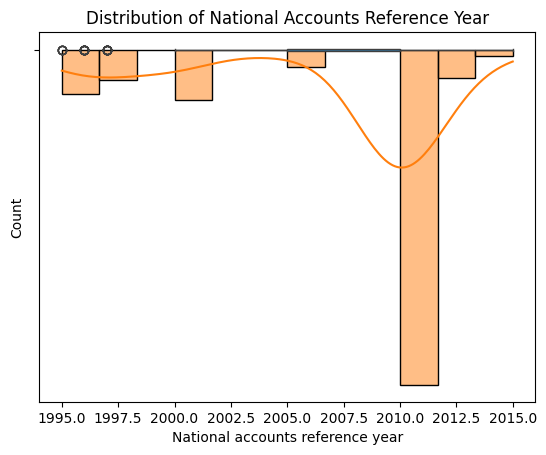

In [110]:
# Boxplot and histograms for 'National accounts reference year'
sns.boxplot(x=data_cleaned['National accounts reference year'])
sns.histplot(data_cleaned['National accounts reference year'], kde=True)
plt.title('Distribution of National Accounts Reference Year')
plt.show()

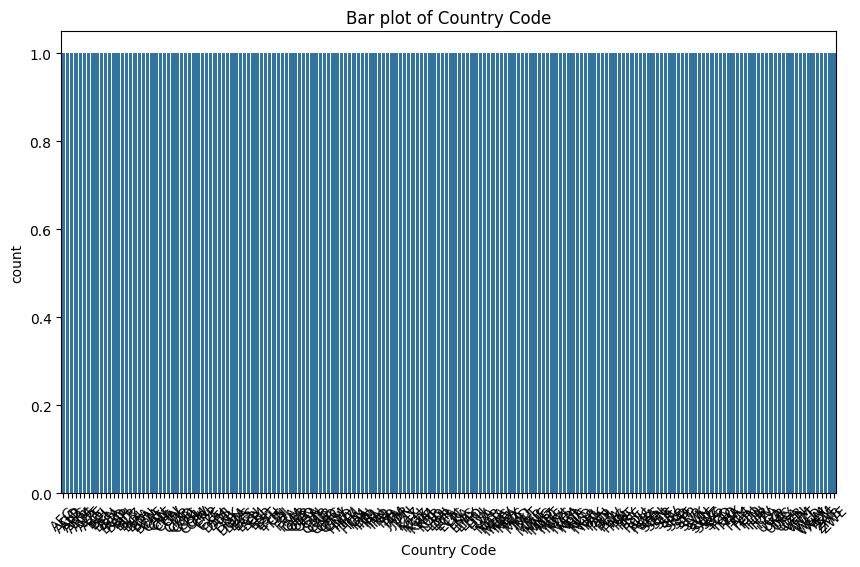

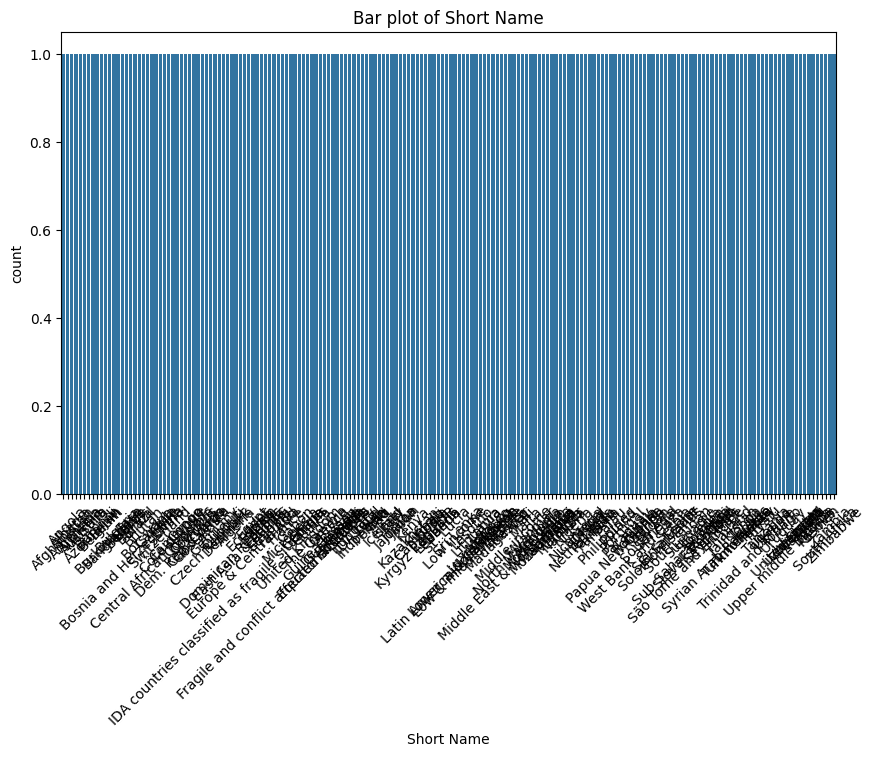

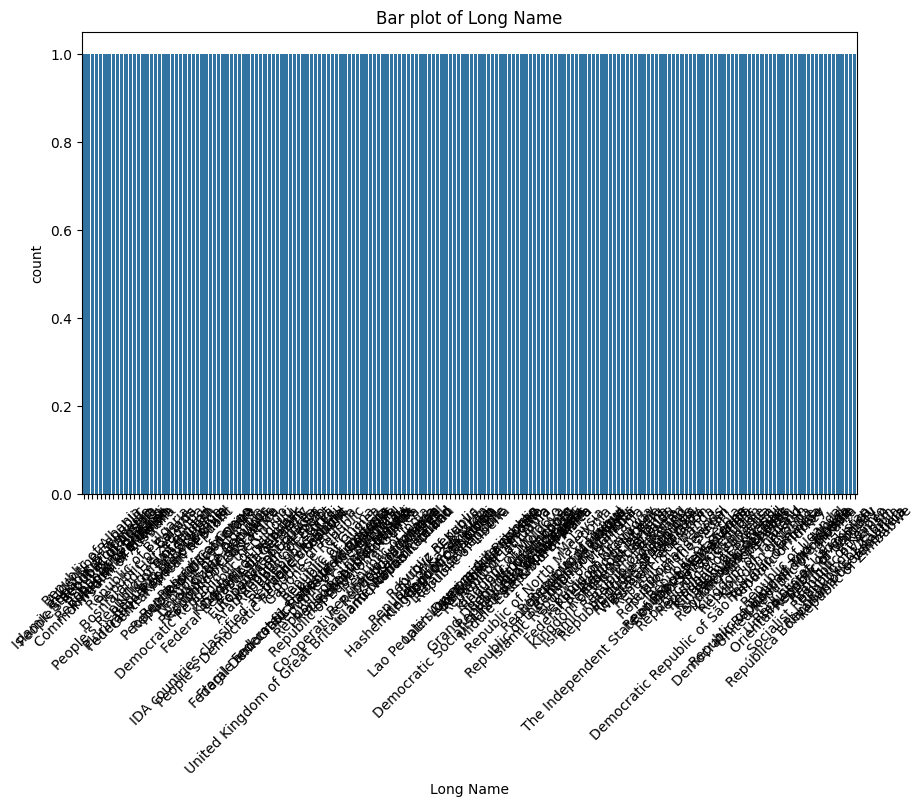

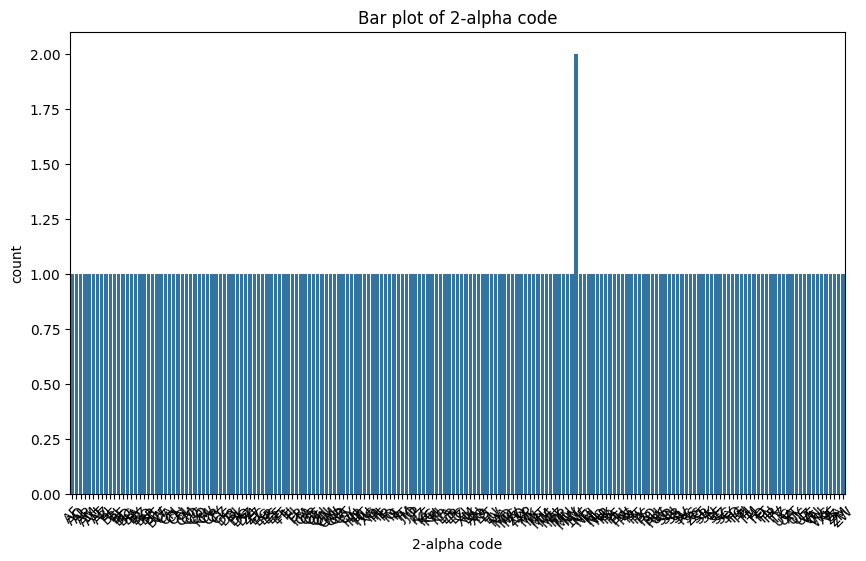

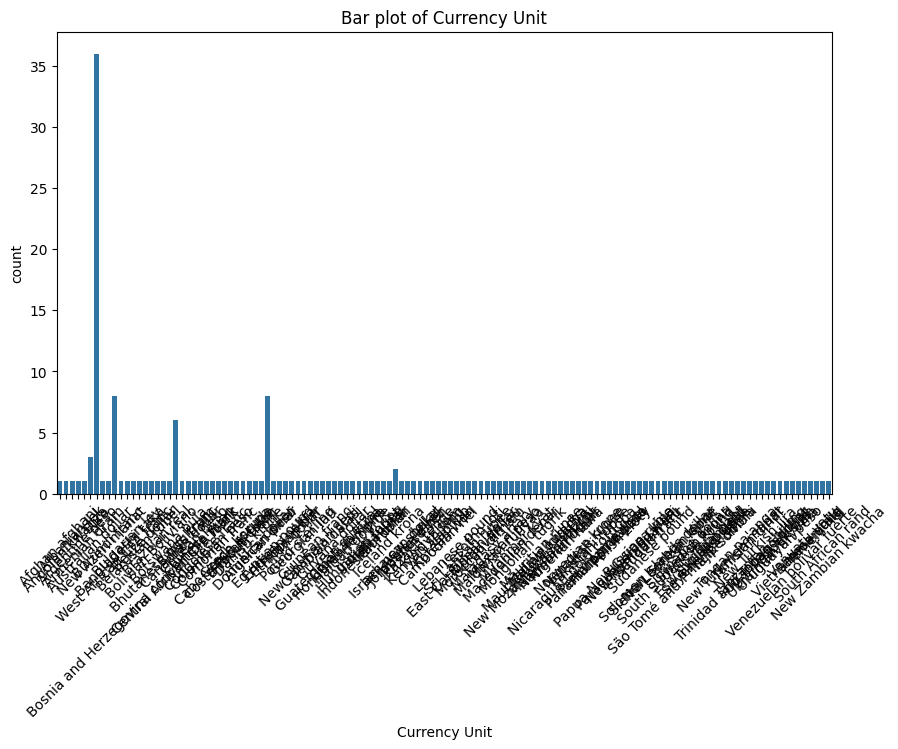

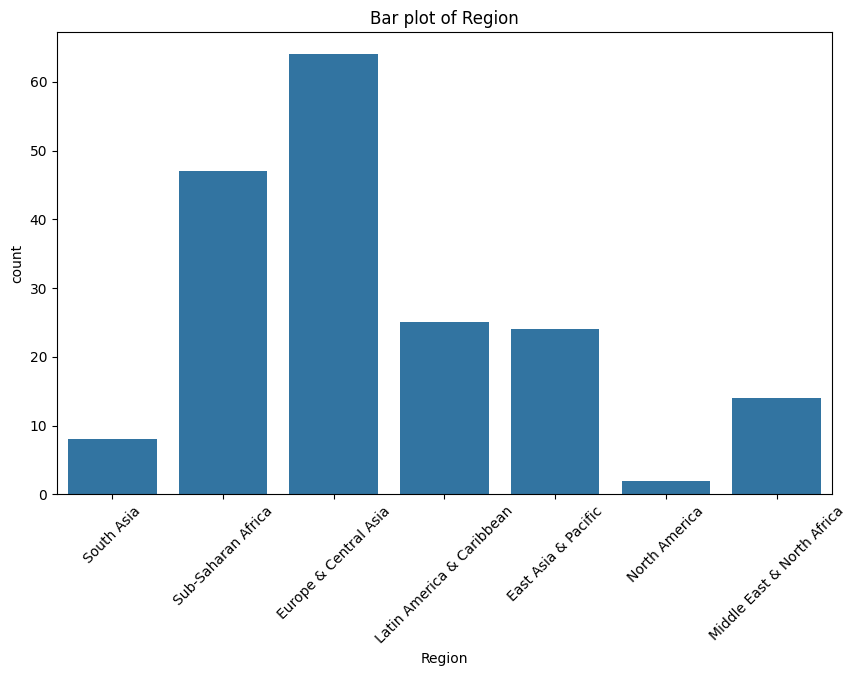

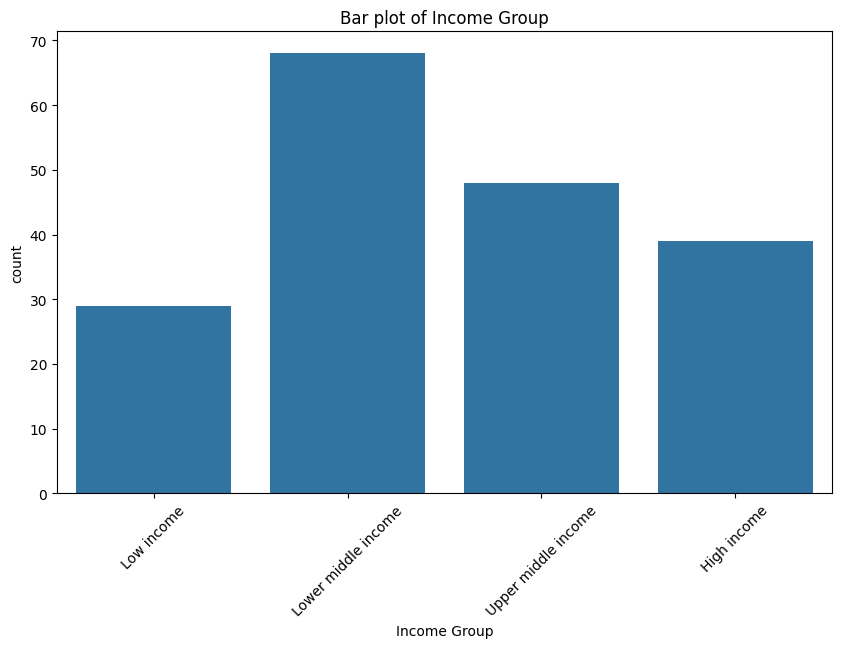

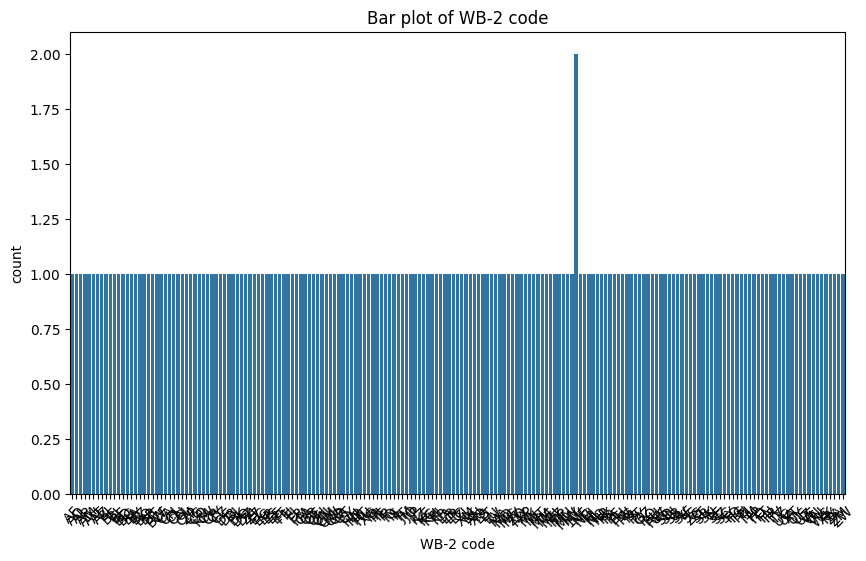

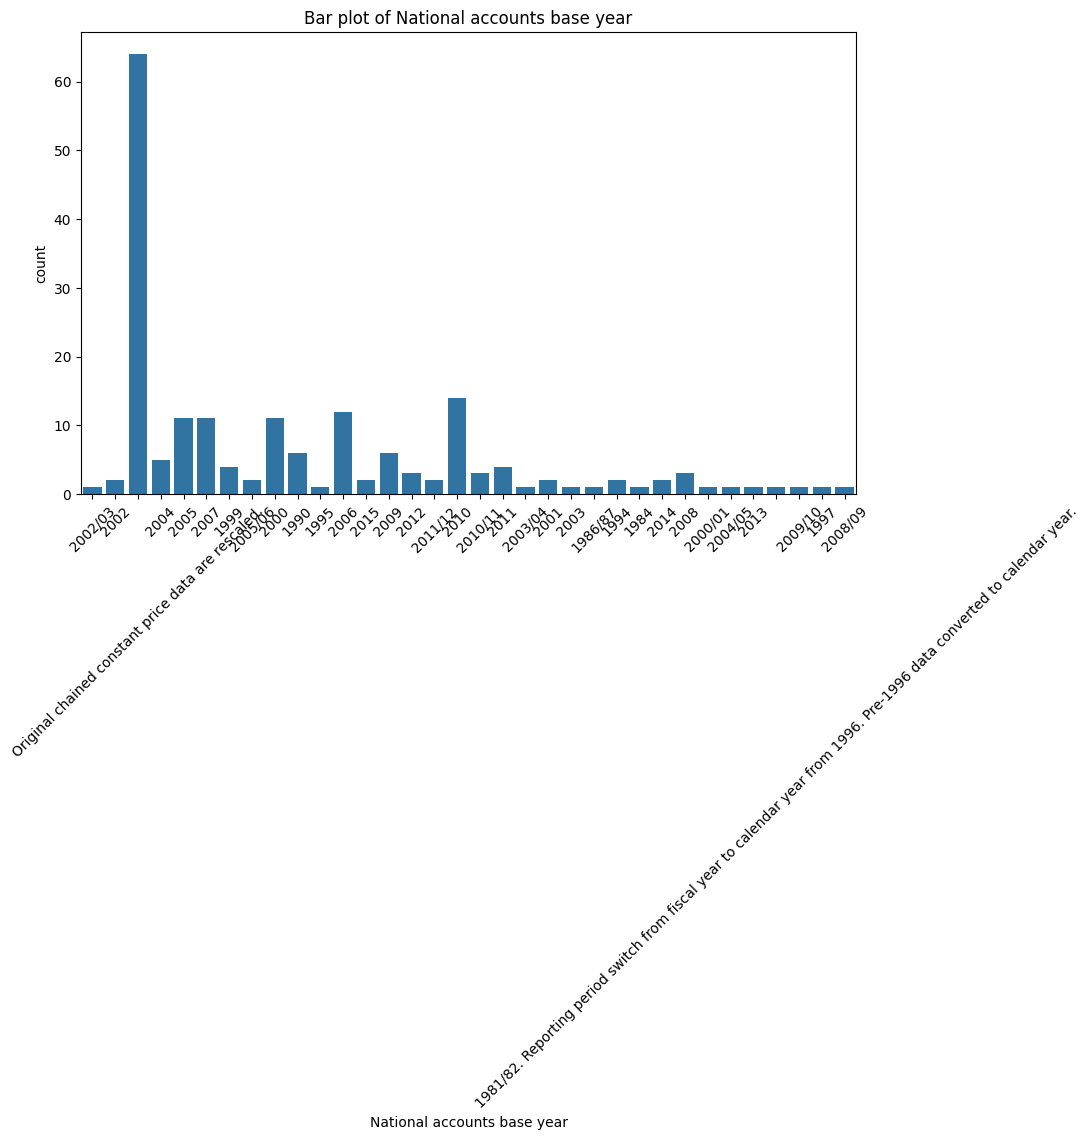

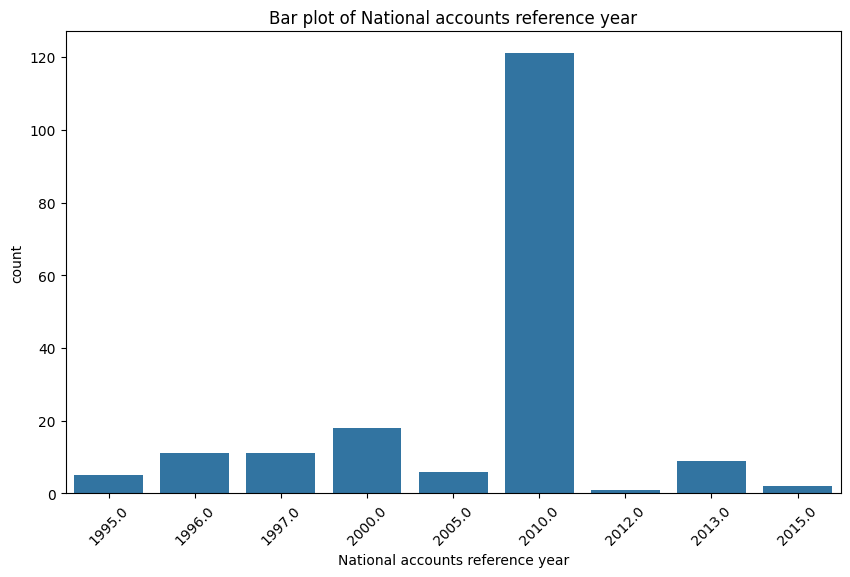

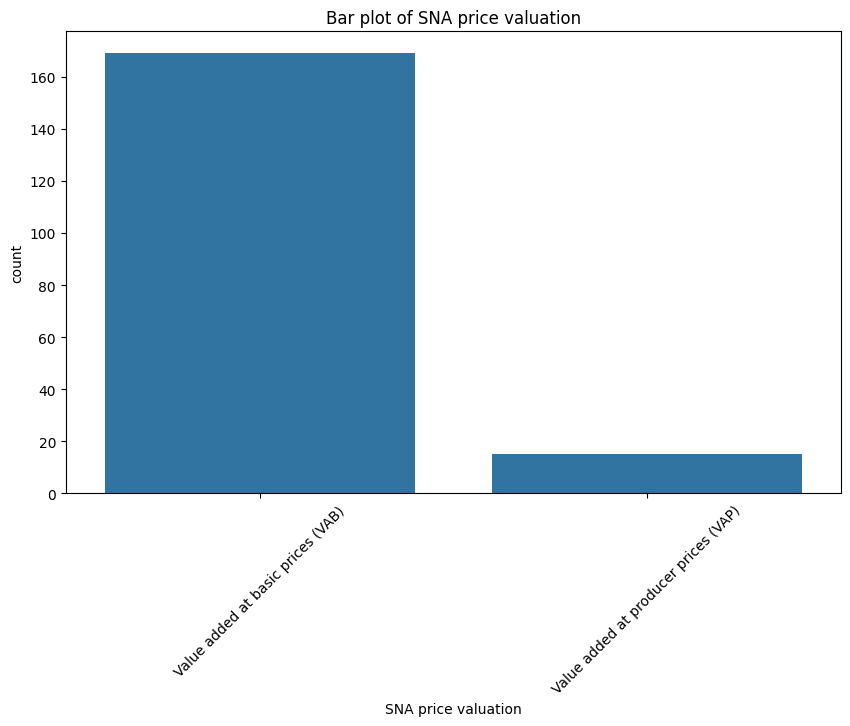

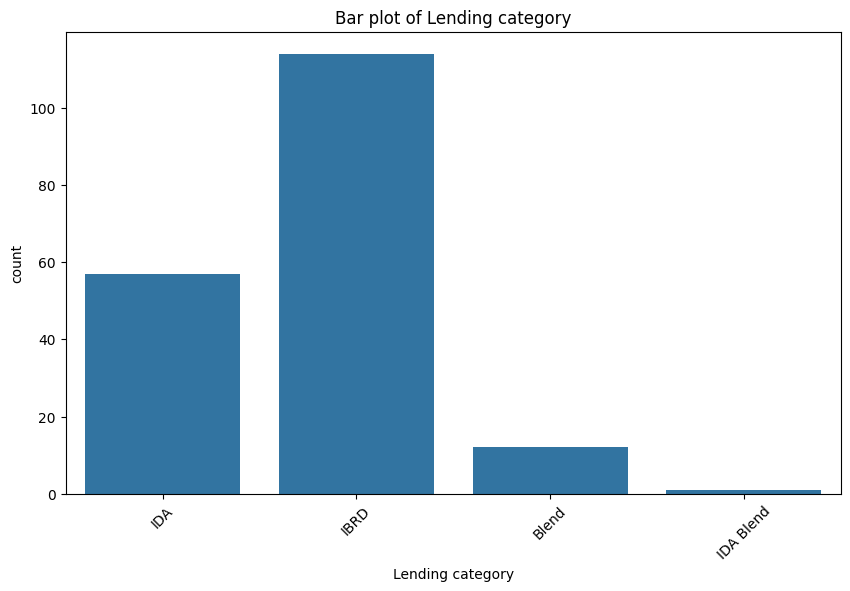

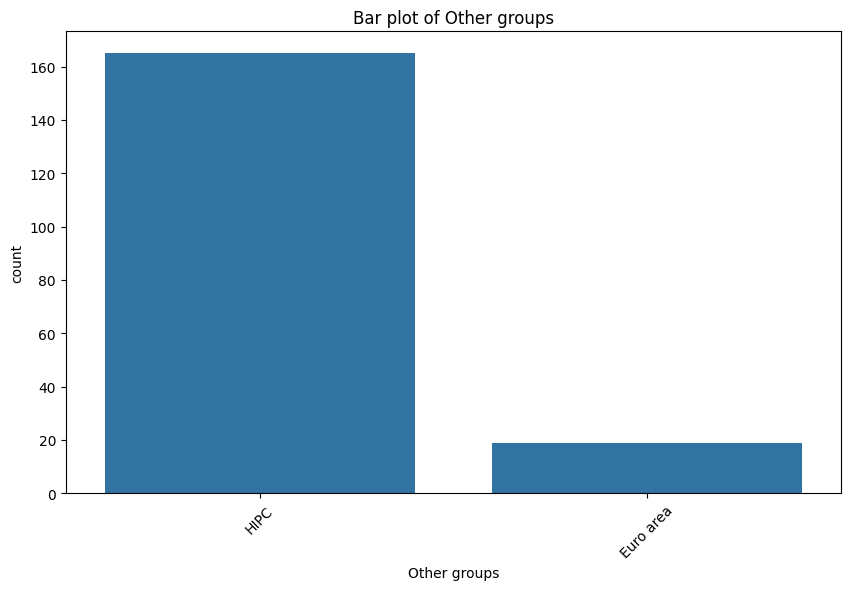

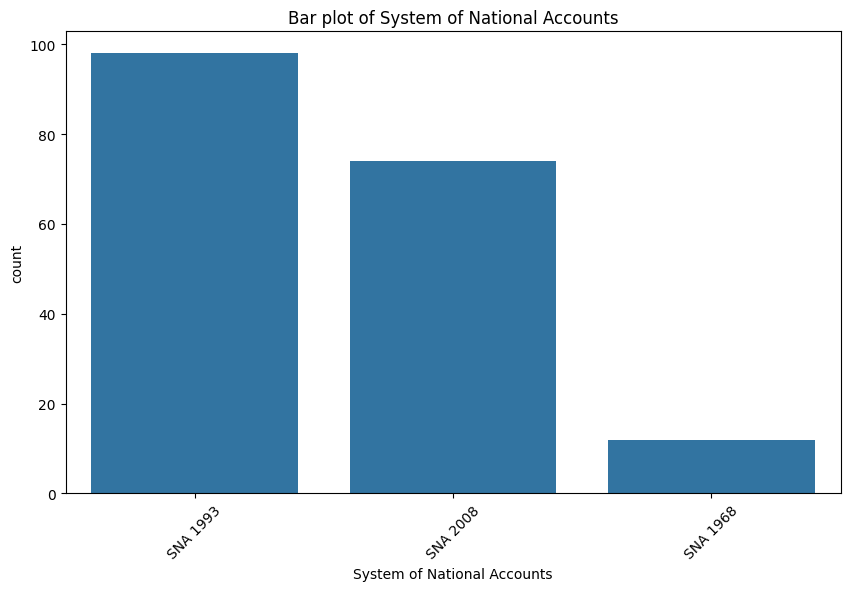

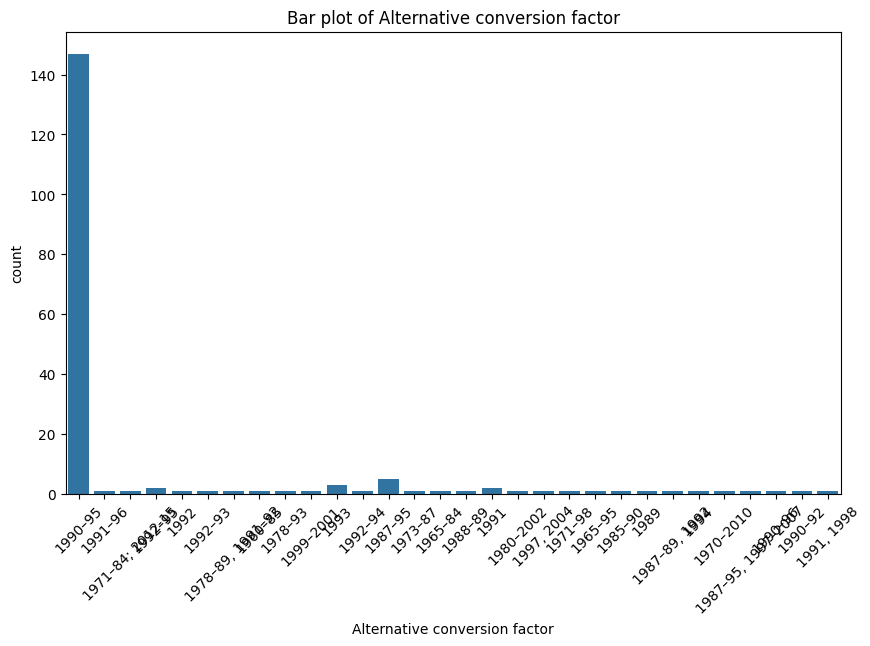

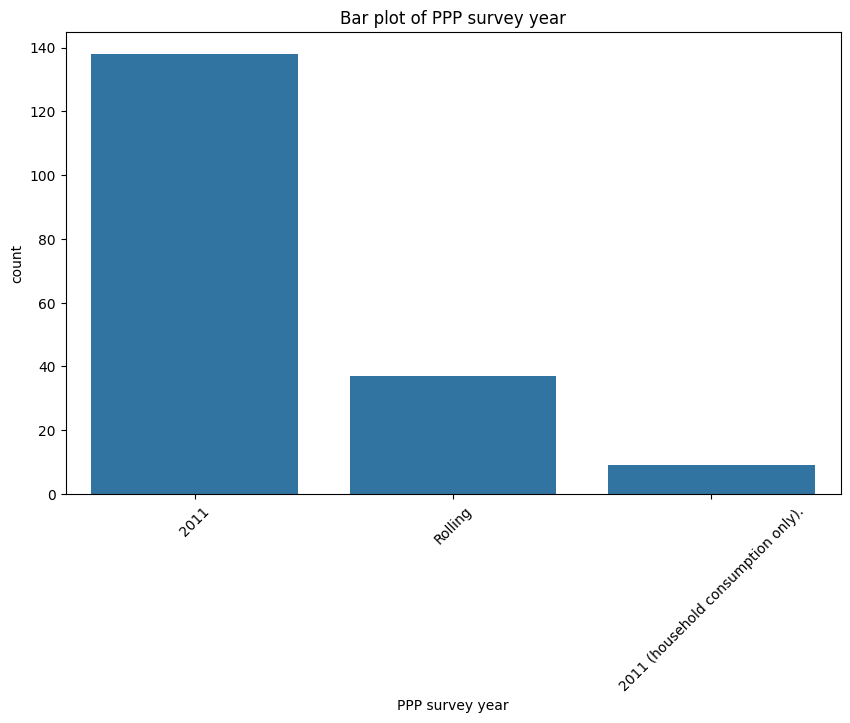

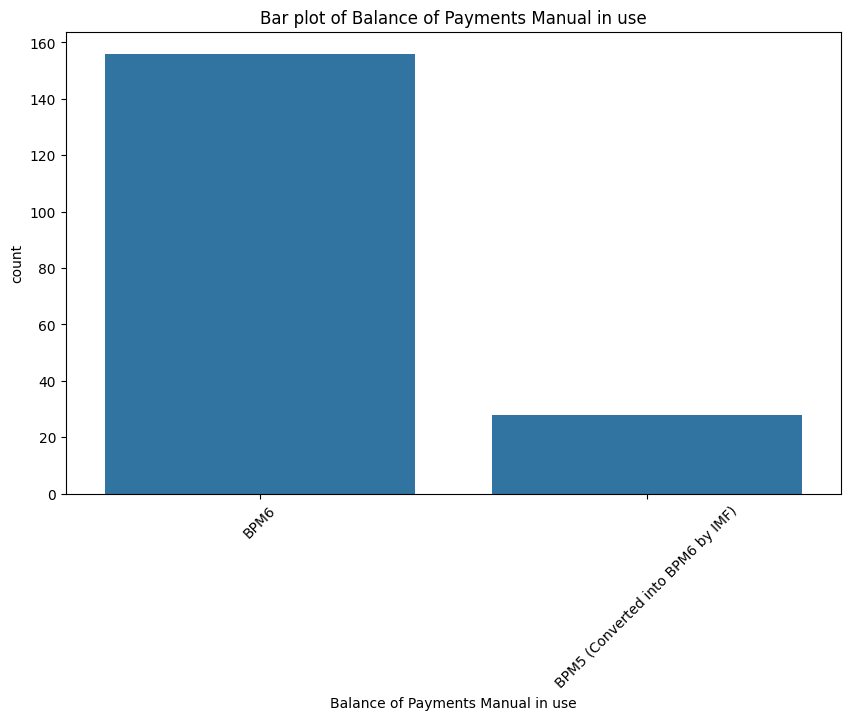

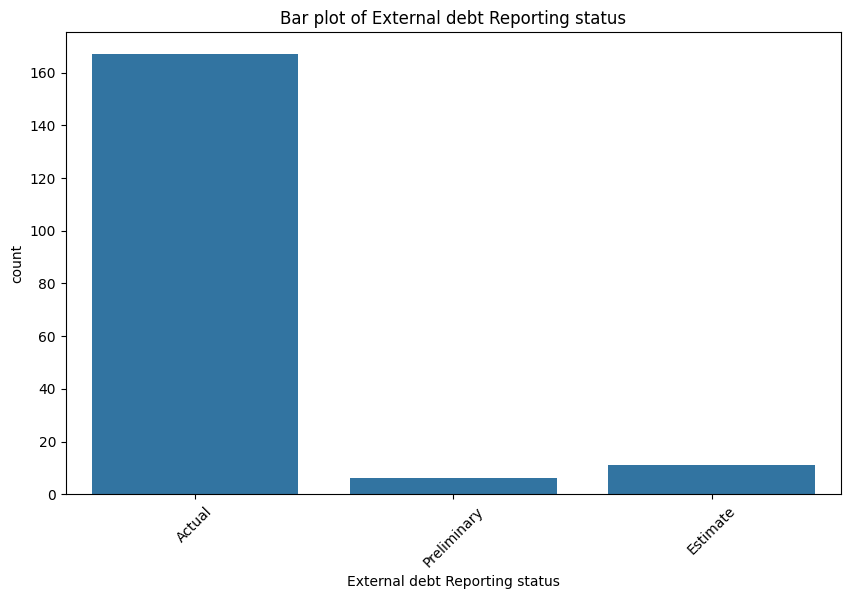

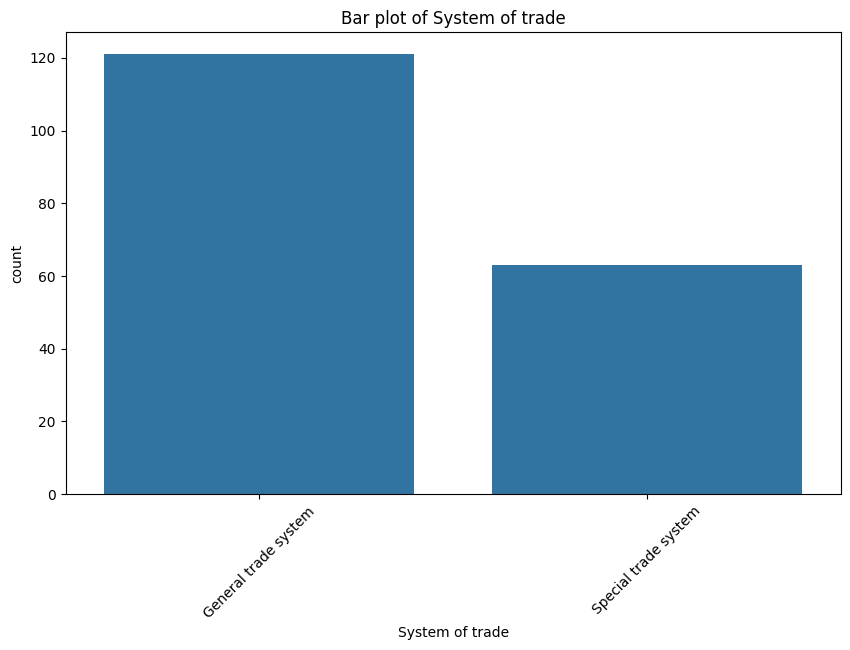

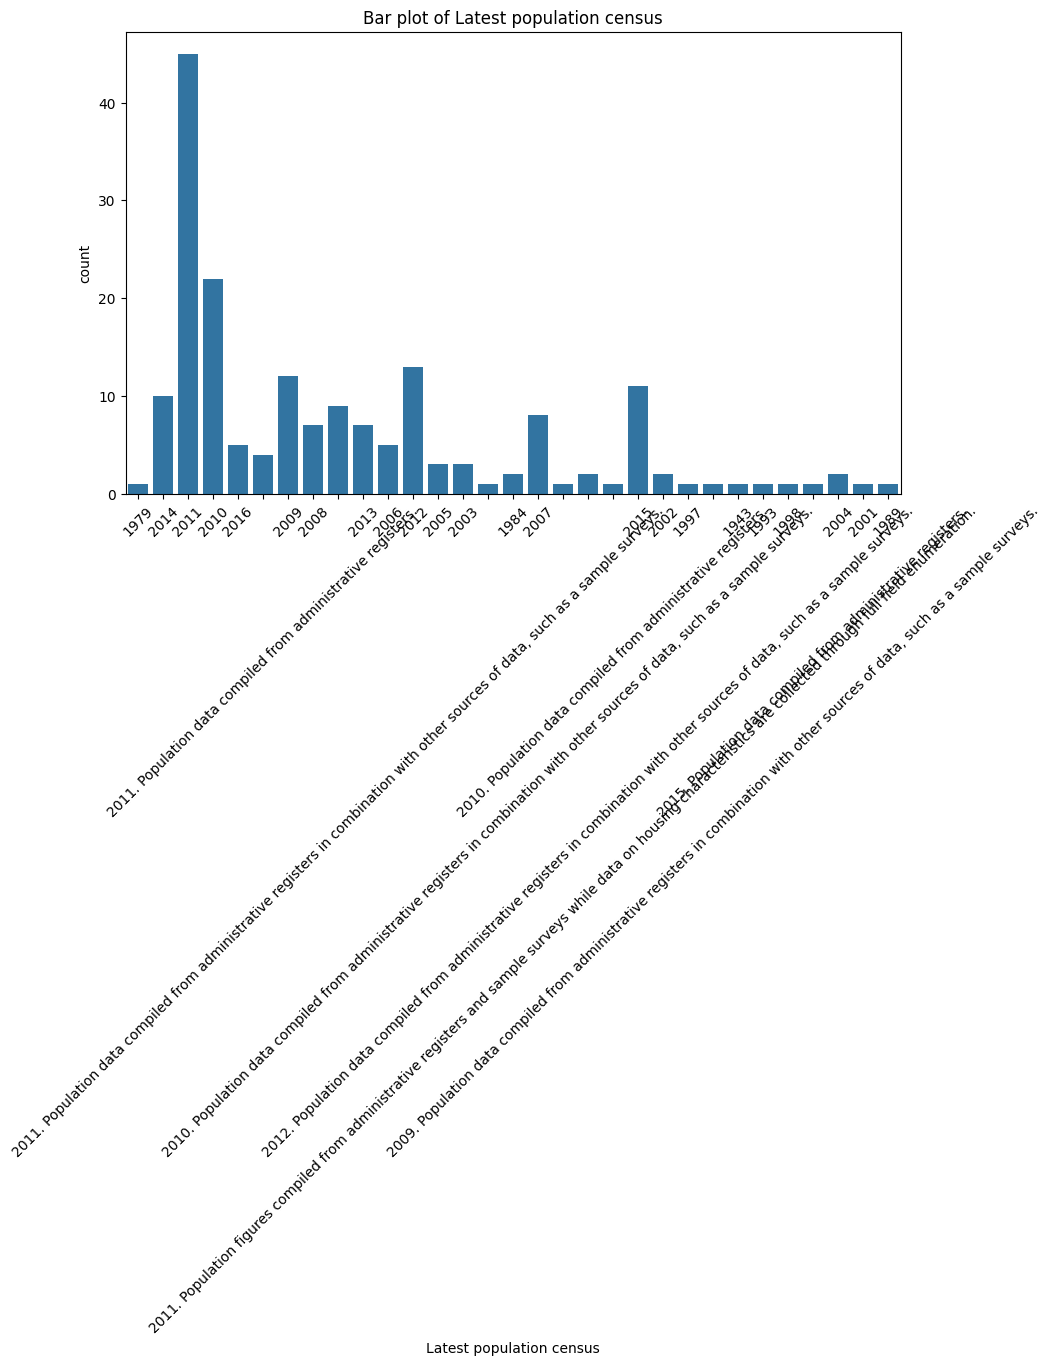

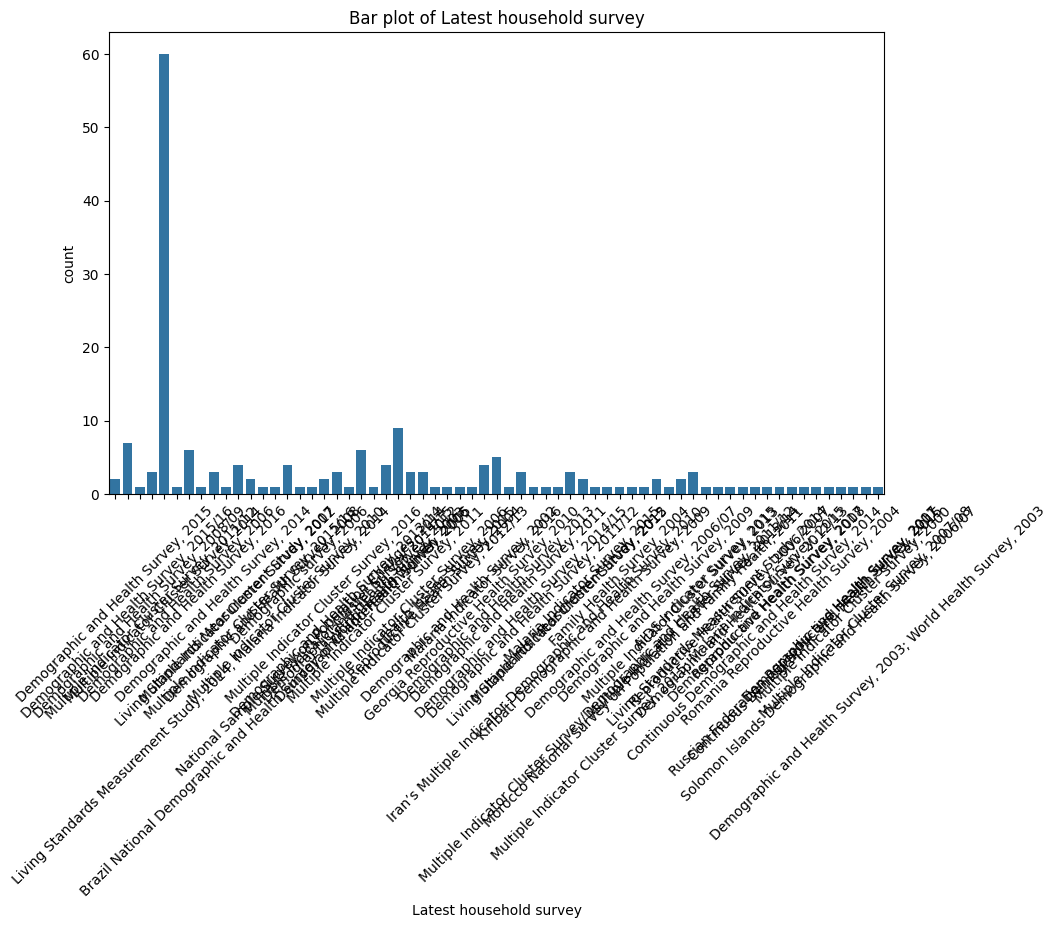

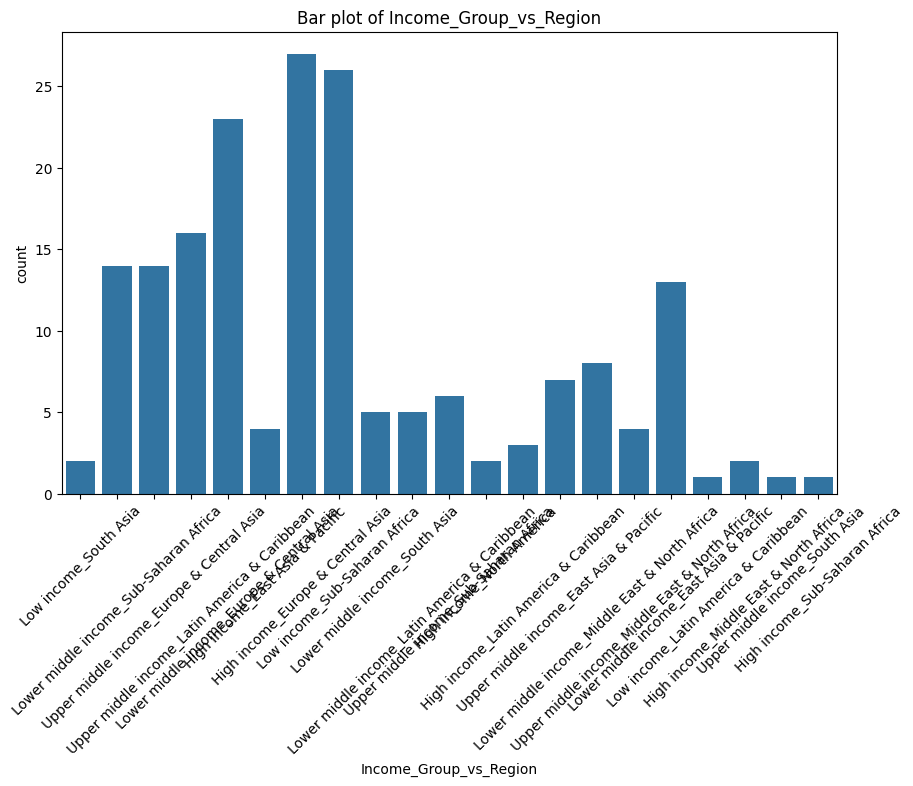

In [111]:
for col in data_cleaned:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data_cleaned)
    plt.title(f"Bar plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

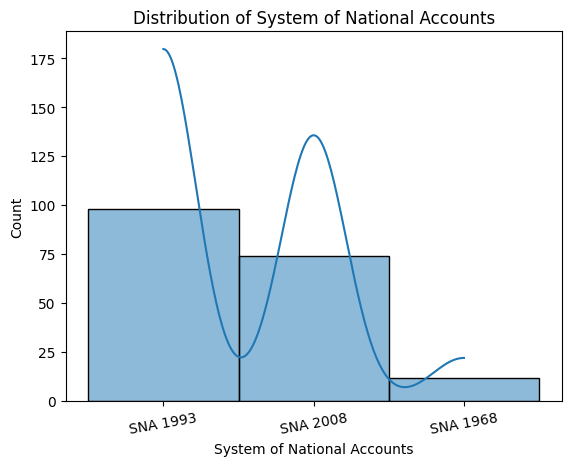

In [112]:
# Histogram for 'System of National Accounts'
sns.histplot(data_cleaned['System of National Accounts'], kde=True)
plt.xticks(rotation=10)
plt.title('Distribution of System of National Accounts')
plt.show()

##### IDA stands for International Development Association, which is an international financial institution that offers concessional loans and grants to the world's poorest countries.

##### IBRD stands for International Bank for Reconstruction and Development, which is part of the World Bank Group and provides loans and financial products to middle-income and creditworthy low-income countries.

##### Blend likely refers to countries that are eligible for both IDA and IBRD assistance, known as blend countries.

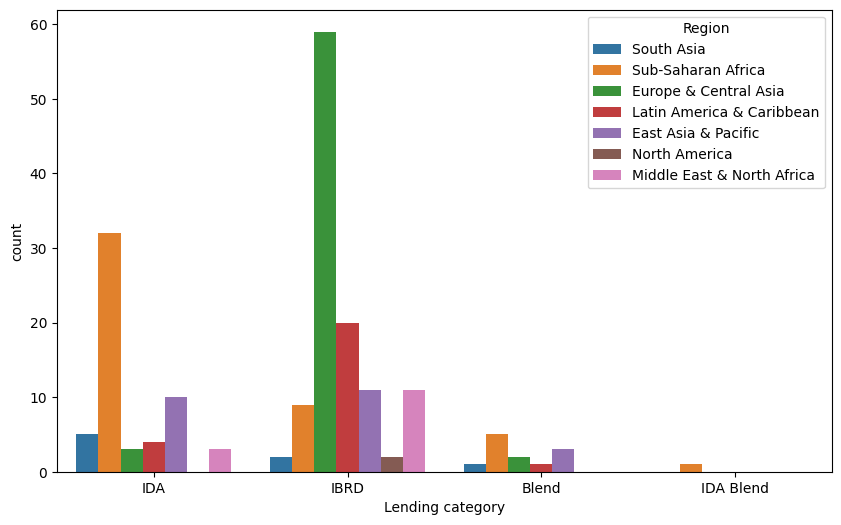

In [113]:
# Count plot for 'Lending category' with 'Region' hue
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Lending category', hue='Region')
plt.show()

<Axes: xlabel='National accounts reference year'>

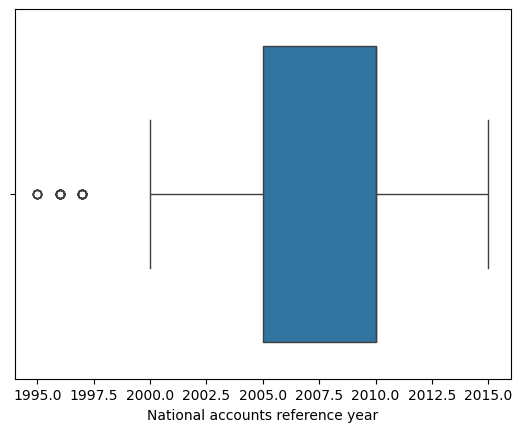

In [114]:
sns.boxplot(x= data_cleaned['National accounts reference year'])

In [115]:
data_cleaned['National accounts reference year'].value_counts()

National accounts reference year
2010.0    121
2000.0     18
1996.0     11
1997.0     11
2013.0      9
2005.0      6
1995.0      5
2015.0      2
2012.0      1
Name: count, dtype: int64

In [116]:
data_cleaned['National accounts reference year'].max()

2015.0

In [117]:
data_cleaned['National accounts reference year'].min()

1995.0

In [118]:
# data_cleaned.to_csv('data_cleaned.csv', index=False)

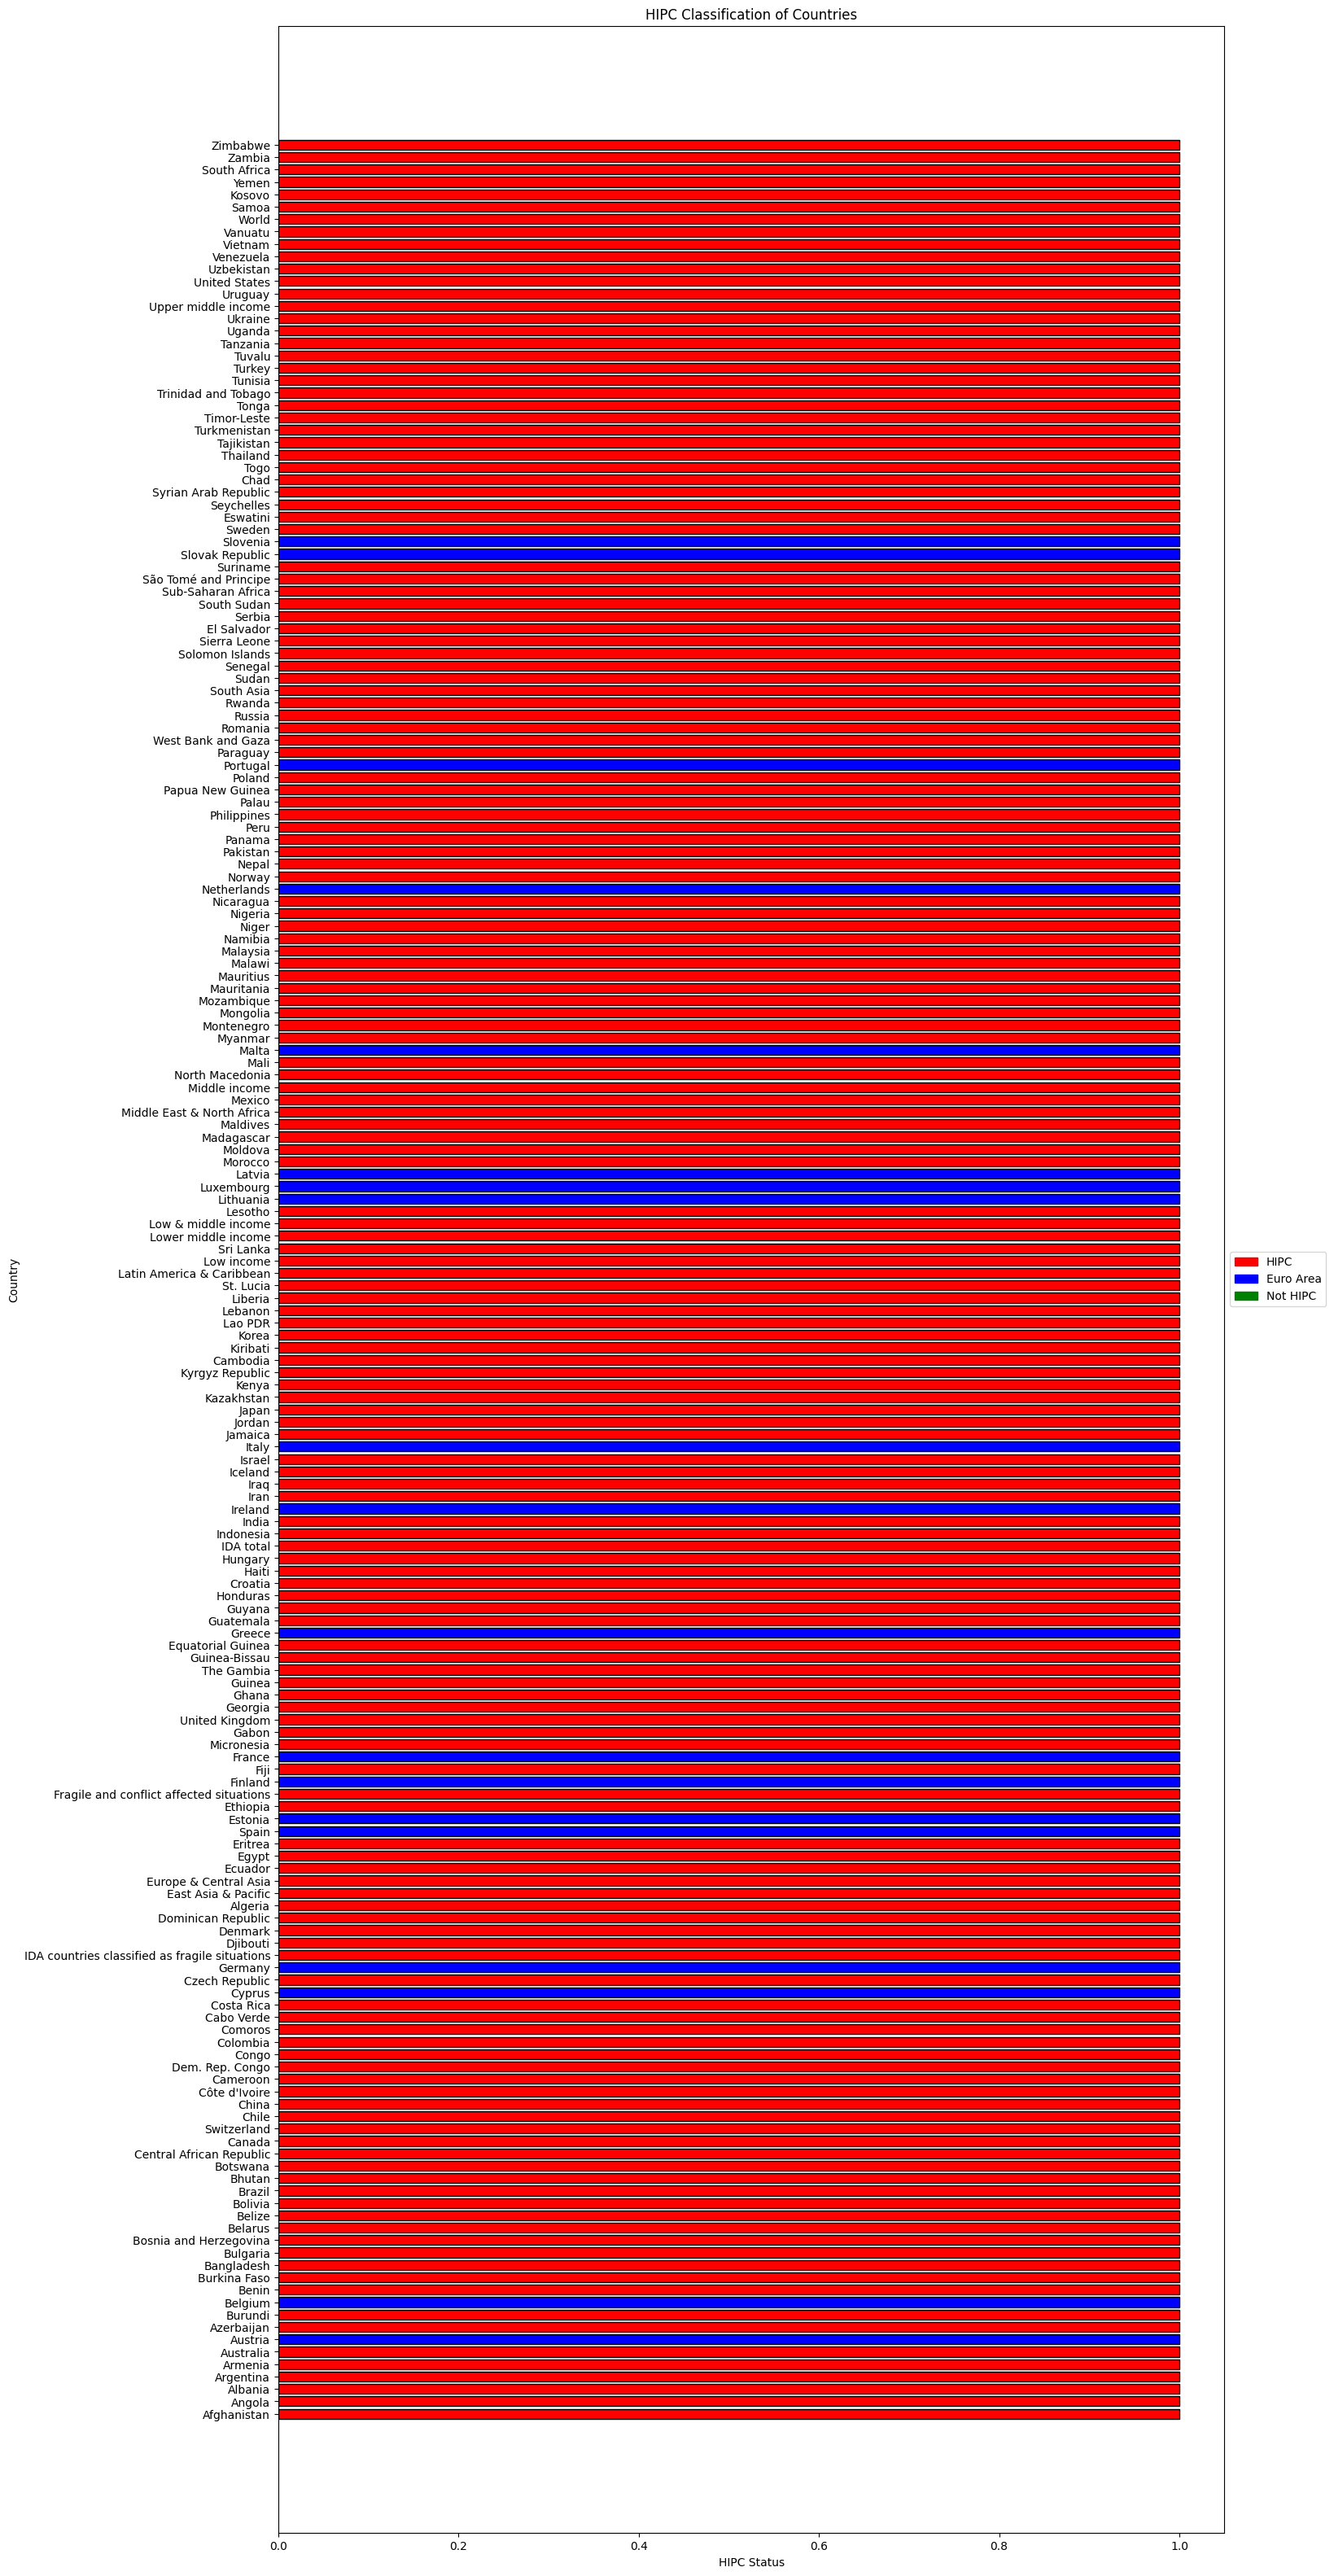

In [119]:
# Bar plot for 'HIPC Classification of Countries'
colors = {'HIPC': 'red', 'Euro area': 'blue', 'Not HIPC': 'green'}
labels = {'HIPC': 'HIPC', 'Euro area': 'Euro Area', 'Not HIPC': 'Not HIPC'}

plt.figure(figsize=(15, 40))
plt.barh(data_cleaned['Short Name'], [1] * len(data_cleaned), color=data_cleaned['Other groups'].apply(lambda x: colors[x]), edgecolor='black')
plt.xlabel('HIPC Status')
plt.ylabel('Country')
plt.title('HIPC Classification of Countries')
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels], labels=labels.values(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [120]:
pip install pandas-profiling
from pandas_profiling import ProfileReport
ProfileReport(data_cleaned, title='Pandas Profiling Report', explorative=True)

SyntaxError: invalid syntax (705673143.py, line 1)

In [ ]:
# plt.figure(figsize=(14, 8))
# sns.countplot(data=data_cleaned, y='Income_Group_vs_Region', palette='viridis')
# plt.title('Income Group vs Region')
# plt.xlabel('Count')
# plt.ylabel('Income Group vs Region')
# plt.xticks(rotation=45)
# plt.show()

# <b><span style='color:#fcc36d'> </span><span style='color:#ff6200'>  Features engineering </span>

##### This new column allows you to see how different income groups are distributed across various regions.
##### Each bar represents how many times a particular income group and region combination occurs in the dataset.


In [ ]:
# Create interaction feature
data_cleaned['Income_Group_vs_Region'] = data_cleaned['Income Group'] + "_" + data_cleaned['Region']


In [ ]:
# Prepare the data for ML
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])


# <b><span style='color:#fcc36d'> </span><span style='color:#ff6200'> Model Training & Evaluation: </span>

In [ ]:
# Split the data
X = data_cleaned.drop('Income Group', axis=1)
y = data_cleaned['Income Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LinearRegression

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

In [ ]:
# Log the model with MLflow
mlflow.start_run()
mlflow.log_param("model", "Linear Regression")
mlflow.log_metric("mse", mse)
mlflow.log_metric("r2", r2)
mlflow.sklearn.log_model(model, "model")
mlflow.end_run()

# Save the model and label encoders
joblib.dump(model, 'linear_regression_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

In [ ]:
# Perform cross-validation
#5 folds (cv=5) to check the model's performance on different subsets of the data.
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation scores
print(f'Cross-validation R² scores: {cv_scores}')
print(f'Mean R² score: {np.mean(cv_scores)}')
print(f'Standard deviation of R² scores: {np.std(cv_scores)}')


##### Mean Squared Error (MSE): 0.0127 - This is a very low error, indicating good model performance.
##### R² Score: 0.9893 - The model explains 98.93% of the variability in the data.
##### Cross-validation Mean R² score: 0.9890 - The model's performance is consistent across different subsets of the data.

### Support Vector classification

In [ ]:
# Train the model using SVC
model = SVC()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_str}')

# Save the trained SVC model in MLflow for future comparison and usage.
# Log the model with MLflow
mlflow.start_run()
mlflow.log_param("model", "SVC")
mlflow.log_metric("accuracy", accuracy)
mlflow.sklearn.log_model(model, "model")
mlflow.end_run()

In [ ]:
# Perform cross-validation
model = SVC()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean accuracy score: {np.mean(cv_scores)}')
print(f'Standard deviation of accuracy scores: {np.std(cv_scores)}')


In [ ]:
# Visualize the cross-validation scores
plt.figure(figsize=(10, 6))
sns.boxplot(cv_scores)
plt.title('Cross-validation Accuracy Scores for SVC Model')
plt.ylabel('Accuracy')
plt.xlabel('Cross-validation folds')
plt.show()


* The SVC model has an accuracy of about 38%, which is relatively low.
* Cross-validation shows similar accuracy scores, indicating consistent performance across different data splits.
* The MLflow logs allow us to save the model and its metrics, making it easier to track and compare with other models in the future.

##### find the best parameters from the grid.
### GridSearchCV


##### C controls the trade-off between correct classification and maximizing the margin.
##### gamma defines how far the influence of a single training example reaches.
##### kernel specifies the type of kernel to use (rbf for radial basis function, linear for a linear kernel).

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy Score: {grid_search.best_score_}')

In [ ]:
# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_str}')

# Visualize the cross-validation scores of the best model
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']

plt.figure(figsize=(10, 6))
sns.boxplot(data=[cv_results['split0_test_score'], cv_results['split1_test_score'], cv_results['split2_test_score'], cv_results['split3_test_score'], cv_results['split4_test_score']])
plt.title('Cross-validation Accuracy Scores for SVC Model (Grid Search)')
plt.ylabel('Accuracy')
plt.xlabel('Cross-validation folds')
plt.show()

### RandomForestClassifier

In [ ]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy Score: {grid_search.best_score_}')

# Predict using the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_str}')

# Visualize the cross-validation scores of the best model
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']

plt.figure(figsize=(10, 6))
sns.boxplot(data=[cv_results['split0_test_score'], cv_results['split1_test_score'], cv_results['split2_test_score'], cv_results['split3_test_score'], cv_results['split4_test_score']])
plt.title('Cross-validation Accuracy Scores for RandomForestClassifier (Grid Search)')
plt.ylabel('Accuracy')
plt.xlabel('Cross-validation folds')
plt.show()


### Compare SVC and Random Forest results.

In [ ]:
# Prepare the data (assuming X and y are already defined and preprocessed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for SVC
svc_grid_search = GridSearchCV(SVC(), svc_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
svc_grid_search.fit(X_train, y_train)

# Initialize GridSearchCV for RandomForestClassifier
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best models
best_svc_model = svc_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

# Predict and evaluate the SVC model
svc_y_pred = best_svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
svc_classification_report = classification_report(y_test, svc_y_pred)

# Predict and evaluate the RandomForest model
rf_y_pred = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_classification_report = classification_report(y_test, rf_y_pred)

# Print results
print("SVC Best Parameters:", svc_grid_search.best_params_)
print("SVC Best Accuracy Score:", svc_grid_search.best_score_)
print("SVC Test Accuracy:", svc_accuracy)
print("SVC Classification Report:\n", svc_classification_report)

print("RandomForest Best Parameters:", rf_grid_search.best_params_)
print("RandomForest Best Accuracy Score:", rf_grid_search.best_score_)
print("RandomForest Test Accuracy:", rf_accuracy)
print("RandomForest Classification Report:\n", rf_classification_report)

# Visualize the cross-validation scores
svc_cv_results = svc_grid_search.cv_results_
rf_cv_results = rf_grid_search.cv_results_

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=[svc_cv_results['split0_test_score'], svc_cv_results['split1_test_score'], svc_cv_results['split2_test_score'], svc_cv_results['split3_test_score'], svc_cv_results['split4_test_score']])
plt.title('Cross-validation Accuracy Scores for SVC (Grid Search)')
plt.ylabel('Accuracy')
plt.xlabel('Cross-validation folds')

plt.subplot(1, 2, 2)
sns.boxplot(data=[rf_cv_results['split0_test_score'], rf_cv_results['split1_test_score'], rf_cv_results['split2_test_score'], rf_cv_results['split3_test_score'], rf_cv_results['split4_test_score']])
plt.title('Cross-validation Accuracy Scores for RandomForest (Grid Search)')
plt.ylabel('Accuracy')
plt.xlabel('Cross-validation folds')

plt.show()


In [ ]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Train and predict probabilities for SVC
svc_model = OneVsRestClassifier(SVC(C=0.1, gamma=1, kernel='linear', probability=True))
y_score_svc = svc_model.fit(X_train, y_train).predict_proba(X_test)

# Train and predict probabilities for RandomForest
rf_model = OneVsRestClassifier(RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42))
y_score_rf = rf_model.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class for SVC
fpr_svc = dict()
tpr_svc = dict()
roc_auc_svc = dict()
for i in range(n_classes):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test_binarized[:, i], y_score_svc[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])

# Compute ROC curve and ROC area for each class for RandomForest
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curves
plt.figure(figsize=(14, 7))

# Plot ROC curves for SVC
plt.subplot(1, 2, 1)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_svc[i], tpr_svc[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc_svc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend(loc="lower right")

# Plot ROC curves for RandomForest
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc_rf[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForest')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


### Extract feature importances
##### The code extracts the feature importances from the best RandomForestClassifier model obtained from GridSearchCV.


In [ ]:
# Assuming best_rf_model is the best RandomForestClassifier model obtained from GridSearchCV
# Extract feature importances

importances = best_rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({importances[indices[f]]:.4f})")

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### Model Evaluation on Unseen Data:

Unseen Data refers to data that the model has not encountered during its training process. This is crucial for evaluating the performance of a machine learning model because it simulates how the model will perform in real-world scenarios where it must make predictions on new, unseen data.


In [ ]:
# Assuming X and y are already defined

# Split the data into training, validation, and test sets
X_train_val, X_test_final, y_train_val, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Train the final model using the best parameters found
best_rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
best_rf_model.fit(X_train_val, y_train_val)

# Evaluate the model on the unseen test set
y_pred_final = best_rf_model.predict(X_test_final)
accuracy_final = accuracy_score(y_test_final, y_pred_final)
classification_report_final = classification_report(y_test_final, y_pred_final)

print(f'Final Test Accuracy: {accuracy_final}')
print(f'Final Classification Report:\n{classification_report_final}')

##### Saving the model and encoders allows for easy reuse without retraining and ensures consistent data preprocessing.
##### for gradio

In [121]:
# Assuming data_cleaned is your preprocessed DataFrame
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])

# Assuming X and y are your features and target variable
X = data_cleaned.drop('Income Group', axis=1)
y = data_cleaned['Income Group']

# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model.fit(X, y)

# Save the trained model
joblib.dump(rf_model, 'best_rf_model.pkl')

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

# <b><span style='color:#fcc36d'> </span><span style='color:#ff6200'> Deployment using gradio </span>

In [126]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

# Generating synthetic data
np.random.seed(42)

categories = {
    'Region': ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa'],
    'Latest household survey': ['2010', '2015', 'Multiple Indicator Cluster Survey, 2006', 'Demographic and Health Survey, 2013'],
    'Lending category': ['IDA', 'IBRD'],
    'Currency Unit': ['Dollar', 'Euro', 'Yen', 'Syrian pound', 'Yemeni rial'],
    'System of National Accounts': ['SNA 1993', 'SNA 2008', 'Special trade system'],
    'Other groups': ['HIPC', 'Euro area'],
    'System of trade': ['Imports CIF, exports FOB', 'Imports and exports CIF', 'Special trade system'],
    'Balance of Payments Manual in use': ['BPM5', 'BPM6', 'BPM5 (Converted into BPM6 by IMF)'],
    'External debt Reporting status': ['Reported', 'Not reported', 'Actual'],
    'SNA price valuation': ['Market prices', 'Factor costs', 'Value added at basic prices (VAB)'],
}

n_samples = 200
data = {
    'Region': np.random.choice(categories['Region'], n_samples),
    'PPP survey year': np.random.randint(2011, 2023, n_samples),
    'Latest household survey': np.random.choice(categories['Latest household survey'], n_samples),
    'Lending category': np.random.choice(categories['Lending category'], n_samples),
    'National accounts base year': np.random.randint(1990, 2023, n_samples),
    'Currency Unit': np.random.choice(categories['Currency Unit'], n_samples),
    'System of National Accounts': np.random.choice(categories['System of National Accounts'], n_samples),
    'Latest population census': np.random.randint(2004, 2023, n_samples),
    'Other groups': np.random.choice(categories['Other groups'], n_samples),
    'Country Code': np.random.choice(['US', 'FR', 'JP', 'YEM'], n_samples),
    'National accounts reference year': np.random.randint(1997, 2023, n_samples),
    'Alternative conversion factor': np.random.uniform(0.5, 1.5, n_samples),
    'System of trade': np.random.choice(categories['System of trade'], n_samples),
    'Balance of Payments Manual in use': np.random.choice(categories['Balance of Payments Manual in use'], n_samples),
    'External debt Reporting status': np.random.choice(categories['External debt Reporting status'], n_samples),
    'SNA price valuation': np.random.choice(categories['SNA price valuation'], n_samples),
    'Income Group': np.random.choice([0, 1, 2, 3], n_samples)  # Assuming 4 income groups
}

df = pd.DataFrame(data)

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split data
X = df.drop('Income Group', axis=1)
y = df['Income Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Save the model and label encoders
joblib.dump(linear_regression_model, 'linear_regression_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

# Load the trained model (ensure the file exists in the same directory)
linear_regression_model = joblib.load('linear_regression_model.pkl')

# Load the label encoders (ensure the file exists in the same directory)
label_encoders = joblib.load('label_encoders.pkl')

# Function to make predictions
def predict_income_group(*inputs):
    input_data = pd.DataFrame([inputs], columns=[
        'Region', 'PPP survey year', 'Latest household survey', 
        'Lending category', 'National accounts base year', 
        'Currency Unit','System of National Accounts', 
        'Latest population census', 'Other groups',
        'Country Code', 
        'National accounts reference year', 'Alternative conversion factor', 
        'System of trade', 'Balance of Payments Manual in use', 
        'External debt Reporting status', 'SNA price valuation'
    ])
    
    # Encode categorical features
    for col in label_encoders:
        input_data[col] = label_encoders[col].transform(input_data[col])
    
    # Make prediction
    prediction = linear_regression_model.predict(input_data)
    
    # Round prediction to nearest income group
    income_group = round(prediction[0])
    
    return f'Predicted Income Group: {income_group}'

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_income_group,
    inputs=[
        gr.Dropdown(label="Region", choices=categories['Region']),
        gr.Number(label="PPP survey year"),
        gr.Dropdown(label="Latest household survey", choices=categories['Latest household survey']),
        gr.Dropdown(label="Lending category", choices=categories['Lending category']),
        gr.Number(label="National accounts base year"),
        gr.Dropdown(label="Currency Unit", choices=categories['Currency Unit']),
        gr.Dropdown(label="System of National Accounts", choices=categories['System of National Accounts']),
        gr.Number(label="Latest population census"),
        gr.Dropdown(label="Other groups", choices=categories['Other groups']),
        gr.Textbox(label="Country Code"),
        gr.Number(label="National accounts reference year"),
        gr.Number(label="Alternative conversion factor"),
        gr.Dropdown(label="System of trade", choices=categories['System of trade']),
        gr.Dropdown(label="Balance of Payments Manual in use", choices=categories['Balance of Payments Manual in use']),
        gr.Dropdown(label="External debt Reporting status", choices=categories['External debt Reporting status']),
        gr.Dropdown(label="SNA price valuation", choices=categories['SNA price valuation']),
    ],
    outputs=gr.Textbox(label="Predicted Income Group"),
    title="Income Group Prediction",
    description="Enter the socio-economic indicators to predict the Income Group of a country using the trained Linear Regression model."
)

# Launch the interface
interface.launch()



Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


<h2 align="left"><font color='#ff6200'>Best Regards!</font></h2>